In [277]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (
    Ridge,RidgeCV,
    Lasso,LassoCV,
    ElasticNet, ElasticNetCV,
    LinearRegression
)
from sklearn.model_selection import(
    cross_val_score,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)
from sklearn.feature_selection import SelectFromModel
# pd.set_option('display.max_rows', 1000)  # or 1000
# pd.set_option('display.max_columns', 1000)  # or 1000

from itertools import combinations
from itertools import permutations

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('datasets/train.csv')
kaggle_test = pd.read_csv('datasets/test.csv')

In [282]:
kaggle_test.index

RangeIndex(start=0, stop=878, step=1)

In [8]:
# rename column names 

new_columns = {
    'Id': 'id',
    'PID':'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'lot_front',
    'Lot Area': 'lot_area',
    'Street': 'street',
    'Alley':'alley',
    'Lot Shape': 'lot_shape',
    'Land Contour':'land_contour',
    'Utilities': 'util',
    'Lot Config': 'lot_config',
    'Land Slope': 'land_slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'cond_1',    
    'Condition 2': 'cond_2',
    'Bldg Type': 'bldg_type',
    'House Style': 'house_style',
    'Overall Qual': 'overall_qual',
    'Overall Cond': 'overall_cond',
    'Year Built': 'year_built',
    'Year Remod/Add': 'year_remod_add',
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_matl',
    'Exterior 1st': 'ext_1st',
    'Exterior 2nd': 'ext_2nd',
    'Mas Vnr Type': 'mas_vnr_type',
    'Mas Vnr Area': 'mas_vnr_area',
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 1': 'bsmtfin_type1',
    'BsmtFin SF 1': 'bsmtfin_sf1',
    'BsmtFin Type 2': 'bsmt_type2',
    'BsmtFin SF 2': 'bsmt_sf2',
    'Bsmt Unf SF': 'bsmt_unf_sf',
    'Total Bsmt SF': 'total_bsmt_sf',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',
    'Central Air': 'central_air',
    'Electrical': 'electrical',
    '1st Flr SF': '1st_flr_sf',
    '2nd Flr SF': '2nd_flr_sf',
    'Low Qual Fin SF': 'low_qual_fin_sf',
    'Gr Liv Area': 'gr_liv_area',
    'Bsmt Full Bath': 'bsmt_full_bath',    
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bedroom_abv_gr',
    'Kitchen AbvGr': 'kitchen_abv_gr',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'tot_rms_abv_grd',
    'Functional': 'functional',
    'Fireplaces': 'fireplace',
    'Fireplace Qu': 'fireplace_qu',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_yr_blt',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garag_cars',
    'Garage Area': 'garage_area',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'wood_deck_sf',
    'Open Porch SF': 'open_porch_sf',
    'Enclosed Porch': 'enclosed_porch',
    '3Ssn Porch': '3ssn_porch',
    'Screen Porch': 'screen_porch',
    'Pool Area': 'pool_area',
    'Pool QC': 'pool_qc',
    'Fence': 'fence',
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_val',
    'Mo Sold': 'mo_sold',
    'Yr Sold': 'yr_sold',
    'Sale Type': 'sale_type',
    'SalePrice':'sale_price',
}

df.rename(columns=new_columns, inplace=True)
kaggle_test.rename(columns=new_columns, inplace=True)

In [9]:
df = pd.concat([df,kaggle_test], axis = 0)

## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

**Clean missing values**  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2929 non-null   int64  
 1   pid              2929 non-null   int64  
 2   ms_subclass      2929 non-null   int64  
 3   ms_zoning        2929 non-null   object 
 4   lot_front        2439 non-null   float64
 5   lot_area         2929 non-null   int64  
 6   street           2929 non-null   object 
 7   alley            198 non-null    object 
 8   lot_shape        2929 non-null   object 
 9   land_contour     2929 non-null   object 
 10  util             2929 non-null   object 
 11  lot_config       2929 non-null   object 
 12  land_slope       2929 non-null   object 
 13  neighborhood     2929 non-null   object 
 14  cond_1           2929 non-null   object 
 15  cond_2           2929 non-null   object 
 16  bldg_type        2929 non-null   object 
 17  house_style    

In [11]:
df.shape

(2929, 81)

In [12]:
df.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_front           490
lot_area              0
street                0
alley              2731
lot_shape             0
land_contour          0
util                  0
lot_config            0
land_slope            0
neighborhood          0
cond_1                0
cond_2                0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod_add        0
roof_style            0
roof_matl             0
ext_1st               0
ext_2nd               0
mas_vnr_type         23
mas_vnr_area         23
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            80
bsmt_cond            80
bsmt_exposure        83
bsmtfin_type1        80
bsmtfin_sf1           1
bsmt_type2           81
bsmt_sf2              1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [13]:
# build list of features with na 

feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()]
for feat in feature_nan:
    print(feat, f'has {round((df[feat].isnull().mean())*100,2)}% missing values')

lot_front has 16.73% missing values
alley has 93.24% missing values
mas_vnr_type has 0.79% missing values
mas_vnr_area has 0.79% missing values
bsmt_qual has 2.73% missing values
bsmt_cond has 2.73% missing values
bsmt_exposure has 2.83% missing values
bsmtfin_type1 has 2.73% missing values
bsmtfin_sf1 has 0.03% missing values
bsmt_type2 has 2.77% missing values
bsmt_sf2 has 0.03% missing values
bsmt_unf_sf has 0.03% missing values
total_bsmt_sf has 0.03% missing values
electrical has 0.03% missing values
bsmt_full_bath has 0.07% missing values
bsmt_half_bath has 0.07% missing values
fireplace_qu has 48.55% missing values
garage_type has 5.36% missing values
garage_yr_blt has 5.43% missing values
garage_finish has 5.43% missing values
garag_cars has 0.03% missing values
garage_area has 0.03% missing values
garage_qual has 5.43% missing values
garage_cond has 5.43% missing values
pool_qc has 99.56% missing values
fence has 80.47% missing values
misc_feature has 96.38% missing values
sal

**Some missing values are bigger percentage than the other** 

- we need to find the correlation between the missing values and the sales price to judge if its good to remove or to keep

**Approach**

1) Larger values - might remove

2) Smaller values - need to conduct EDA and decide later

In [14]:
df = df.reset_index()

In [333]:
df.head()

index   id        pid  ms_subclass ms_zoning  lot_front  lot_area street  \
0      0  109  533352170           60        RL  69.199672     13517   Pave   
1      1  544  531379050           60        RL  43.000000     11492   Pave   
2      2  153  535304180           20        RL  68.000000      7922   Pave   
3      3  318  916386060           60        RL  73.000000      9802   Pave   
4      4  255  906425045           50        RL  82.000000     14235   Pave   

     alley lot_shape land_contour    util lot_config land_slope neighborhood  \
0  NoAlley       IR1          Lvl  AllPub    CulDSac        Gtl       Sawyer   
1  NoAlley       IR1          Lvl  AllPub    CulDSac        Gtl      SawyerW   
2  NoAlley       Reg          Lvl  AllPub     Inside        Gtl        NAmes   
3  NoAlley       Reg          Lvl  AllPub     Inside        Gtl       Timber   
4  NoAlley       IR1          Lvl  AllPub     Inside        Gtl      SawyerW   

  cond_1 cond_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0   RRAe   Norm      1Fam      2Story             6             8        1976   
1   Norm   Norm      1Fam      2Story             7             5        1996   
2   Norm   Norm      1Fam      1Story             5             7        1953   
3   Norm   Norm      1Fam      2Story             5             5        2006   
4   Norm   Norm      1Fam      1.5Fin             6             8        1900   

   year_remod_add roof_style roof_matl  ext_1st  ext_2nd mas_vnr_type  \
0            2005      Gable   CompShg  HdBoard  Plywood      BrkFace   
1            1997      Gable   CompShg  VinylSd  VinylSd      BrkFace   
2            2007      Gable   CompShg  VinylSd  VinylSd         None   
3            2007      Gable   CompShg  VinylSd  VinylSd         None   
4            1993      Gable   CompShg  Wd Sdng  Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  bsmt_exposure bsmtfin_type1  bsmtfin_sf1 bsmt_type2  bsmt_sf2  bsmt_unf_sf  \
0            No           GLQ        533.0        Unf       0.0        192.0   
1            No           GLQ        637.0        Unf       0.0        276.0   
2            No           GLQ        731.0        Unf       0.0        326.0   
3            No           Unf          0.0        Unf       0.0        384.0   
4            No           Unf          0.0        Unf       0.0        676.0   

   total_bsmt_sf heating heating_qc central_air electrical  1st_flr_sf  \
0          725.0    GasA         Ex           Y      SBrkr         725   
1          913.0    GasA         Ex           Y      SBrkr         913   
2         1057.0    GasA         TA           Y      SBrkr        1057   
3          384.0    GasA         Gd           Y      SBrkr         744   
4          676.0    GasA         TA           Y      SBrkr         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abv_gr  kitchen_abv_gr kitchen_qual  \
0          2          1               3               1           Gd   
1          2          1               4               1           Gd   
2          1          0               3               1           Gd   

69.19967199671997
68.0


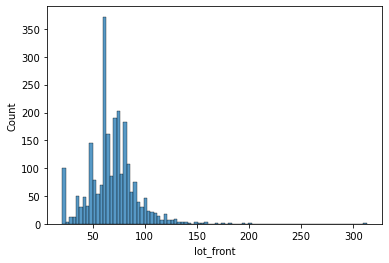

In [15]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())
print(df['lot_front'].median())

In [16]:
# get mean and fill into NA
# why mean -->> because normally distributed centered at mean 69. 
df['lot_front'].fillna(df['lot_front'].mean(),inplace = True)

69.19967199671997


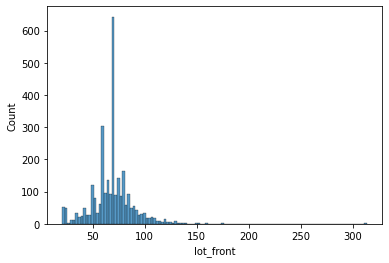

In [17]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())

In [18]:
# change 'nan' to NoAlleyAccess
df['alley'] = df['alley'].map(lambda x: 'NoAlley' if pd.isnull(x) else x)

<AxesSubplot:xlabel='alley', ylabel='sale_price'>

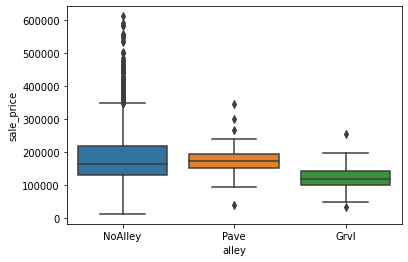

In [19]:
# no meaning to the sales 
# drop alley

sns.boxplot(
    data = df,
    x = 'alley',
    y = 'sale_price'
)

Boxplot shows strong outliers in NoAlley, hence if need to use this data, has to clear outliers first. 

In [20]:
# mas_vnr_type -->> categorical, insert most common type 
df.groupby(by='mas_vnr_type').count()['id']

mas_vnr_type
BrkCmn       25
BrkFace     880
CBlock        1
None       1752
Stone       248
Name: id, dtype: int64

mas_vnr_type already has a None column. Will need to classify nan into the mode of the types for minimal impact


In [21]:
# fill missing values with mode of mas_vnr_type
df['mas_vnr_type'].fillna(df['mas_vnr_type'].mode()[0], inplace = True)

(0.0, 600.0)

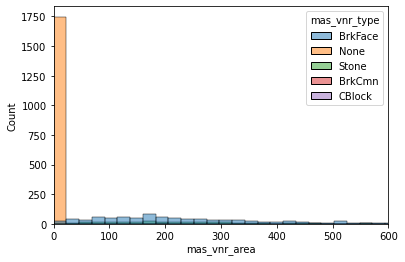

In [22]:
# checked categories for mas_vnr_area
# found if mas vnr area == 0, then belongs to none
sns.histplot(x = 'mas_vnr_area', hue = 'mas_vnr_type', data =df)
plt.xlim(0,600)

<AxesSubplot:xlabel='mas_vnr_type', ylabel='sale_price'>

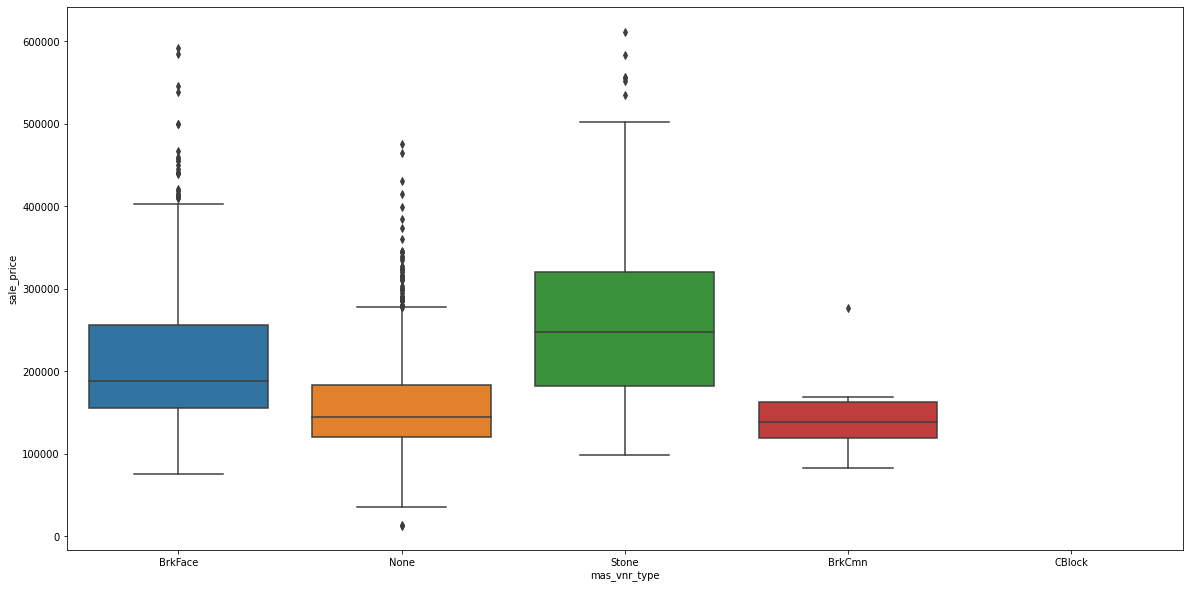

In [23]:
# checking nominal category: mas_vnr_type against sale price

plt.figure(figsize=(20,10))
sns.boxplot(
    x = 'mas_vnr_type',
    y = 'sale_price',
    data = df
)

In [24]:
# create dictionary that stores mean of
mas_dict_mean = {key:val for key, val in df.groupby(['mas_vnr_type'])['mas_vnr_area'].mean().iteritems()}

mas_dict_mean

{'BrkCmn': 195.48,
 'BrkFace': 261.6465909090909,
 'CBlock': 198.0,
 'None': 0.7031963470319634,
 'Stone': 237.44354838709677}

In [25]:
# create function that returns mean based on mas_dict_mean if column has null values 
def enter_area(col):
    area = col[0]
    mas_type = col[1]
    if pd.isnull(area):
        return mas_dict_mean[mas_type]
    else:
        return area

In [26]:
# fill in null values for -->> mas_vnr_area
df['mas_vnr_area'] = df[['mas_vnr_area', 'mas_vnr_type']].apply(enter_area, axis = 1)

In [27]:
# missing values seems common across about bsmt columns 
df[df['bsmt_exposure'].isnull()]

index    id        pid  ms_subclass ms_zoning   lot_front  lot_area  \
12       12   807  906226060           70        RL  120.000000     26400   
93       93   811  906226100           90        RL   64.000000      7018   
114     114   781  905228050           20        RL   69.199672      9000   
146     146   888  908128060           85        RL   64.000000      7301   
183     183  1554  910251050           20   A (agr)   80.000000     14584   
240     240  2740  905451050           20        RL   80.000000     12048   
249     249  2242  910206010           50        RM   64.000000     11067   
256     256  2745  905477010           20        RL   77.000000      8335   
390     390    84  532351140           90        RM   68.000000      8930   
437     437  1501  908201100           90        RL   65.000000      6040   
485     485   155  535327140           20        RL   60.000000      7200   
499     499   812  906226110           90        RL   64.000000      7018   
514     514  2082  905475520           30        RL   69.199672     11515   
580     580  1504  908204160           90        RL   74.000000      6845   
581     581   946  912251110           30   I (all)  109.000000     21780   
616     616  1498  908154080           20        RL  123.000000     47007   
635     635  2904  923125030           20   A (agr)  125.000000     31250   
642     642   953  914476020           90        RL   75.000000     10125   
696     696   274  908102060           30        RL   67.000000      8777   
700     700   207  903454060          190        RM   70.000000      5600   
737     737   788  905402070           20        RL   69.199672     15635   
772     772   679  535451170           90        RL   60.000000      7200   
790     790  1205  534276190           20        RL   74.000000      7785   
794     794  1255  535375140           20        RL   60.000000     10122   
924     924   677  535450160           90        RL   60.000000      8544   
933     933  1375  904101170           50        RL   80.000000     17120   
954     954  2622  535451190           20        RL   60.000000      7200   
1007   1007  1880  534252070           90        RL   69.199672     10899   
1022   1022  2703  904301410           30        RL   55.000000      8250   
1049   1049  2177  908152180           90        RL   69.199672      9555   
1089   1089   709  902205010           30        RM   50.000000      5925   
1098   1098  1260  535383100          190        RL   60.000000     10800   
1125   1125  2626  535454050           90        RL   69.199672      8544   
1157   1157   897  908225370           50        RL   50.000000      8405   
1211   1211  2893  916252170          120        RM   69.199672      8239   
1222   1222  1326  902427045           20        RM   70.000000     12702   
1252   1252   244  905478190           20        RL   60.000000     11100   
1256   1256   813  906226120           90        RL   64.000000      7018   
1270   1270  1569  914476080           90        RL   76.000000     10260   
1327   1327  1342  903230120           20        RM   99.000000      5940   
1331   1331   650  535353060           20        RL   75.000000      9533   
1377   1377  2707  905101330           90        RL   72.000000     10791   
1387   1387   787  905402060           20        RL   69.199672     13680   
1428   1428  1902  534450090           20        RL   50.000000      5000   
1456   1456  1797  528458090           60        FV   81.000000     10411   
1481   1481  2701  904100170           20        RL  100.000000     21370   
1547   1547    67  528445060           20        RL   73.000000      8987   
1594   1594  1502  908201110           90        RL   65.000000      6012   
1620   1620   815  906226140           90        RL   64.000000      7007   
1681   1681  1899  534429030           90        RL   70.000000      9842   
1684   1684  2004  902427140           20        RM   52.000000      8626   
16

<Figure size 1080x1080 with 0 Axes>

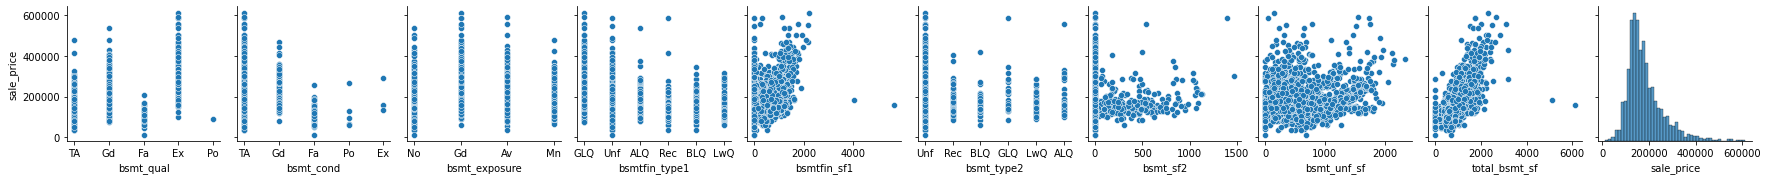

In [28]:
# create pairplot to check relationship between all bsmt parameters against sale_price
# noticed only total_basement_sf area has high correlation with sale_price
# checked only 58 out of 2051 data has NAN -->> meaning no basement 
# will want to change all null to 'NoBsmt'



plt.figure(figsize=(15,15))
sub_bsmt = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'sale_price']

sns.pairplot(
    df,
    x_vars = sub_bsmt,
    y_vars = ['sale_price'],
    
)

In [29]:
# Create none category for those without basement
df['bsmt_cond'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_cond', ylabel='sale_price'>

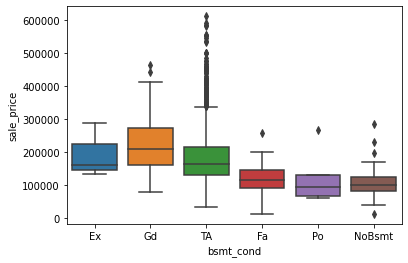

In [30]:
# cross check category, makes sense that those without basement will have lowest mean sale price 
sns.boxplot(
    x = 'bsmt_cond',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
)

In [31]:
# Create none category for those without basement
df['bsmt_type2'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_type2', ylabel='sale_price'>

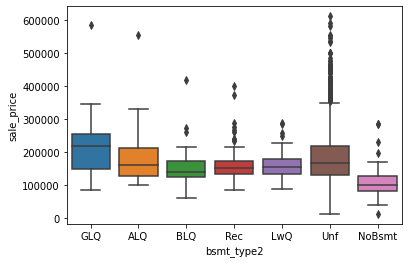

In [32]:
# notice higher prices are under unfinised. 
# no basement is the lowest mean score, which fits the ordinal flow. 

sns.boxplot(
    x = 'bsmt_type2',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
)

In [33]:
# since it is numerical cat, need to take a look at mean. 
# found those with null, average sale price is lower than all the other cats 
# hence safe to create another cat for None. 

bsmt_mean_null = df.loc[df['bsmt_exposure'].isnull(), 'sale_price'].mean()
bsmt_mean = df.groupby('bsmt_exposure').mean()['sale_price']
print(f'mean of null values: {bsmt_mean_null}')
print('\n')
print(f'Mean values of basement exposure: {bsmt_mean}')
df['bsmt_exposure'].value_counts()

mean of null values: 111635.91379310345


Mean values of basement exposure: bsmt_exposure
Av    206262.451389
Gd    271610.566502
Mn    189377.570552
No    164533.532487
Name: sale_price, dtype: float64


No    1906
Av     418
Gd     283
Mn     239
Name: bsmt_exposure, dtype: int64

In [34]:
# Create none category for those without basement
df['bsmt_exposure'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_exposure', ylabel='sale_price'>

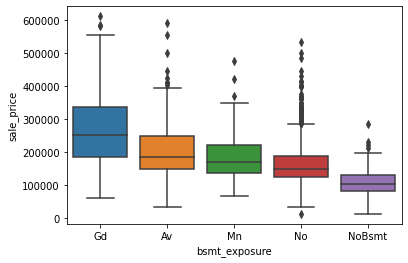

In [35]:
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_exposure',
    y = 'sale_price',
    data = df,
    order = ['Gd','Av','Mn','No','NoBsmt']
)

In [36]:
# fill up null values with NoBsmt
df['bsmt_qual'].fillna('NoBsmt', inplace = True)

<AxesSubplot:xlabel='bsmt_qual', ylabel='sale_price'>

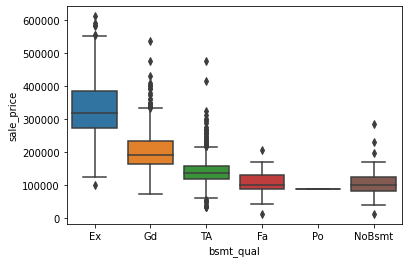

In [37]:
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_qual',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
)

**Seeing small points for Po** 
- might need to remove it if want to use this variable as it might skew predicted data inaccurately. 


In [38]:
# fill up null values with NoBsmt
df['bsmtfin_type1'].fillna('NoBsmt', inplace = True) 

<AxesSubplot:xlabel='bsmtfin_type1', ylabel='sale_price'>

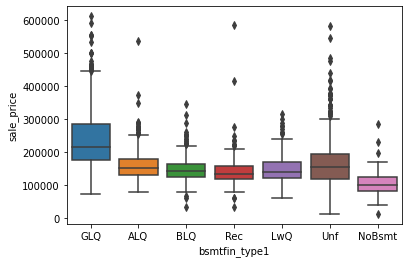

In [39]:
# cross checked ordinally correct for No basement cat

sns.boxplot(
    x = 'bsmtfin_type1',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
)

In [40]:
# checked row has no basement
df[df['total_bsmt_sf'].isnull()]

index    id        pid  ms_subclass ms_zoning  lot_front  lot_area  \
1327   1327  1342  903230120           20        RM       99.0      5940   

     street    alley lot_shape land_contour    util lot_config land_slope  \
1327   Pave  NoAlley       IR1          Lvl  AllPub        FR3        Gtl   

     neighborhood cond_1 cond_2 bldg_type house_style  overall_qual  \
1327      BrkSide  Feedr   Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod_add roof_style roof_matl  ext_1st  \
1327             7        1946            1950      Gable   CompShg  MetalSd   

     ext_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1327  CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type1  bsmtfin_sf1 bsmt_type2  \
1327    NoBsmt    NoBsmt        NoBsmt        NoBsmt          NaN     NoBsmt   

      bsmt_sf2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
1327       NaN          NaN            NaN    GasA         TA           Y   

     electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
1327      FuseA         896           0                0          896   

      bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abv_gr  \
1327             NaN             NaN          1          0               2   

      kitchen_abv_gr kitchen_qual  tot_rms_abv_grd functional  fireplace  \
1327               1           TA                4        Typ          0   

     fireplace_qu garage_type  garage_yr_blt garage_finish  garag_cars  \
1327          NaN      Detchd         1946.0           Unf         1.0   

      garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
1327        280.0          TA          TA           Y             0   

      open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
1327              0               0           0             0          0   

     pool_qc  fence misc_feature  misc_val  mo_sold  yr_sold sale_type  \
1327     NaN  MnPrv          NaN         0        4     2008     ConLD   

      sale_price  
1327     79000.0

In [41]:
# replace na with 0 feet square

df['bsmtfin_sf1'].fillna(0, inplace = True) 
df['bsmt_sf2'].fillna(0, inplace = True) 
df['total_bsmt_sf'].fillna(0, inplace = True) 
df['bsmt_unf_sf'].fillna(0, inplace = True) 

<AxesSubplot:xlabel='fireplace_qu', ylabel='sale_price'>

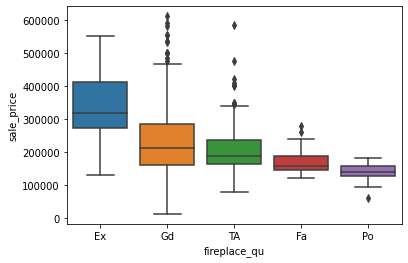

In [42]:
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
)

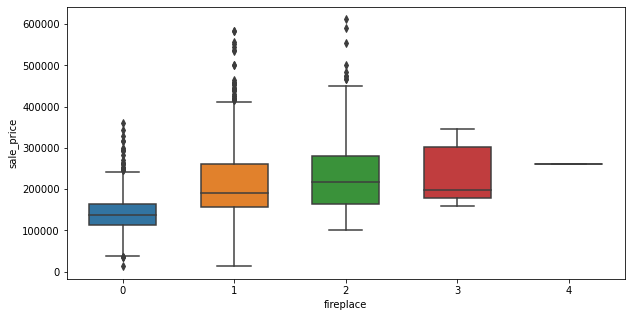

In [43]:
# Establish size of figure.
plt.figure(figsize = (10,5))


sns.boxplot(
    x = 'fireplace',
    y = 'sale_price',
    data = df,
#     hue = 'fireplace_qu',
#     hue_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    width = 0.6
);


In [44]:
df.groupby('fireplace')['fireplace'].count()

fireplace
0    1422
1    1273
2     221
3      12
4       1
Name: fireplace, dtype: int64

**Observed rating 4 having only one point, might need to remove this variable if need to use as results might be skewed**

In [45]:
# null values contain sale price mean close to 144000
df[df['fireplace_qu'].isnull()].agg(['mean', 'median'])['sale_price']

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


mean      142001.103
median    136500.000
Name: sale_price, dtype: float64

In [46]:
# found that cat Po suites best for null values to be included without affecting much mean 
df.groupby(['fireplace_qu']).agg(['mean', 'median', 'count'])['sale_price']

mean    median  count
fireplace_qu                                
Ex            331481.483871  320000.0     31
Fa            170287.203390  159500.0     59
Gd            233578.388145  213490.0    523
Po            139263.967742  139000.0     31
TA            204893.621622  188500.0    407

In [47]:
# fill na with NoFireplace
df['fireplace_qu'] = df['fireplace_qu'].fillna('NoFireplace')

<AxesSubplot:xlabel='fireplace_qu', ylabel='sale_price'>

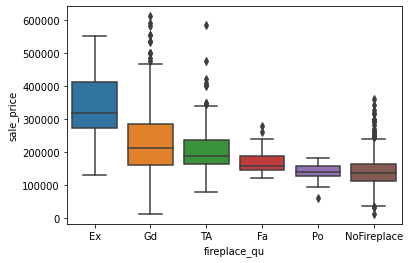

In [48]:
# cross checked ordinally correct for nofireplace
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po','NoFireplace'],
)

**Can see alot of outliers in Gd, TA, and Po (after adding NAN) inside. Hence, this might not be good to insert into our model**

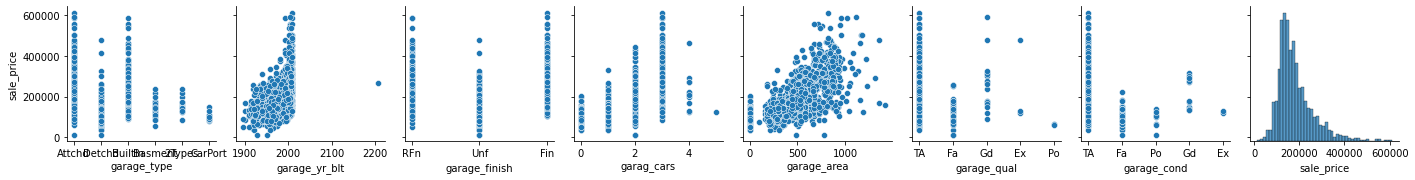

In [49]:
sns.pairplot(
    y_vars = 'sale_price',
    x_vars = ['garage_type',
    'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
    'garage_qual', 'garage_cond','sale_price'],
    data = df
)

In [50]:
# fill in None for now, might drop categorical columns if need to refine model

df['garage_type'] = df['garage_type'].fillna('NoGarage')
df['garage_finish'] = df['garage_finish'].fillna('NoGarage')
df['garage_qual'] = df['garage_qual'].fillna('NoGarage')
df['garage_cond'] = df['garage_cond'].fillna('NoGarage')

df['garage_area'].fillna(df['garage_area'].mean(),inplace = True)
df['garag_cars'].fillna(df['garag_cars'].mode()[0],inplace = True)
# drop garage year built as null values cannot be replaced, it cannot be replaced by any random values or mean too. 

df.drop(columns = ['garage_yr_blt'], inplace = True)

In [51]:
# noticed when pool area ==0, other categories also null 

df[df['pool_area'] == 0]

index    id        pid  ms_subclass ms_zoning  lot_front  lot_area  \
0         0   109  533352170           60        RL  69.199672     13517   
1         1   544  531379050           60        RL  43.000000     11492   
2         2   153  535304180           20        RL  68.000000      7922   
3         3   318  916386060           60        RL  73.000000      9802   
4         4   255  906425045           50        RL  82.000000     14235   
...     ...   ...        ...          ...       ...        ...       ...   
2924    873  1662  527377110           60        RL  80.000000      8000   
2925    874  1234  535126140           60        RL  90.000000     14670   
2926    875  1373  904100040           20        RL  55.000000      8250   
2927    876  1672  527425140           20        RL  60.000000      9000   
2928    877  1939  535327160           20        RL  70.000000      8400   

     street    alley lot_shape land_contour    util lot_config land_slope  \
0      Pave  NoAlley       IR1          Lvl  AllPub    CulDSac        Gtl   
1      Pave  NoAlley       IR1          Lvl  AllPub    CulDSac        Gtl   
2      Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
3      Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
4      Pave  NoAlley       IR1          Lvl  AllPub     Inside        Gtl   
...     ...      ...       ...          ...     ...        ...        ...   
2924   Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
2925   Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
2926   Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
2927   Pave  NoAlley       Reg          Lvl  AllPub        FR2        Gtl   
2928   Pave  NoAlley       Reg          Lvl  AllPub     Corner        Gtl   

     neighborhood cond_1 cond_2 bldg_type house_style  overall_qual  \
0          Sawyer   RRAe   Norm      1Fam      2Story             6   
1         SawyerW   Norm   Norm      1Fam      2Story             7   
2           NAmes   Norm   Norm      1Fam      1Story             5   
3          Timber   Norm   Norm      1Fam      2Story             5   
4         SawyerW   Norm   Norm      1Fam      1.5Fin             6   
...           ...    ...    ...       ...         ...           ...   
2924       NWAmes   PosN   Norm      1Fam      2Story             6   
2925        NAmes   Norm   Norm      1Fam      2Story             6   
2926       Sawyer  Feedr   Norm      1Fam      1Story             5   
2927        NAmes   Norm   Norm      1Fam      1Story             4   
2928        NAmes   Norm   Norm      1Fam      1Story             5   

      overall_cond  year_built  year_remod_add roof_style roof_matl  ext_1st  \
0                8        1976            2005      Gable   CompShg  HdBoard   
1                5        1996            1997      Gable   CompShg  VinylSd   
2                7        1953            2007      Gable   CompShg  VinylSd   
3                5        2006            2007      Gable   CompShg  VinylSd   
4                8        1900            1993      Gable   CompShg  Wd Sdng   
...            ...         ...             ...        ...       ...      ...   
2924             6        1974            1974      Gable   CompShg  HdBoard   
2925             7        1966            1999      Gable   CompShg  VinylSd   
2926             5        1968            1968        Hip   CompShg  HdBoard   
2927             6        1971            1971      Gable   CompShg  HdBoard   
2928             5        1955            1955      Gable   CompShg  MetalSd   

      ext_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0     Plywood      BrkFace         289.0         Gd         TA     CBlock   
1     VinylSd      BrkFace         132.0         Gd         TA      PConc   
2     VinylSd         None           0.0         TA         Gd     CBlock   
3     VinylSd         None           0.0      

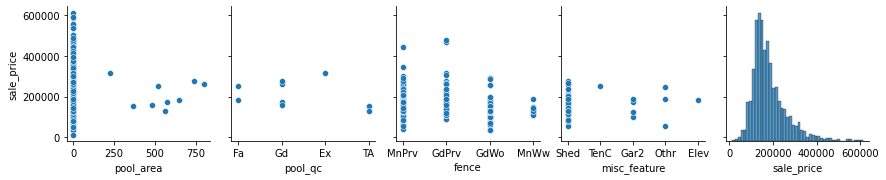

In [52]:
# too little points to do correlation for pool area 

sns.pairplot(
    x_vars = ['pool_area', 'pool_qc', 'fence', 'misc_feature', 'sale_price'],
    y_vars = 'sale_price',
    data = df
)

In [53]:
# drop all pool columns 

drop_pool_list = ['pool_qc', 'fence', 'misc_feature']

df = df.drop(columns = drop_pool_list, axis = 1)

<AxesSubplot:xlabel='year_built', ylabel='sale_price'>

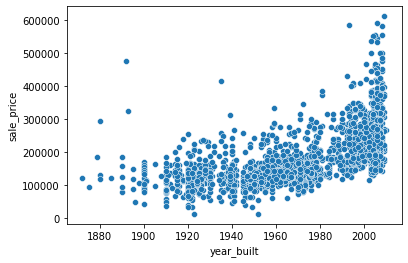

In [54]:
# seeing decreasing trend, and exceptionally high cost built recently 
sns.scatterplot(
    x = 'year_built',
    y = 'sale_price',
    data = df
)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

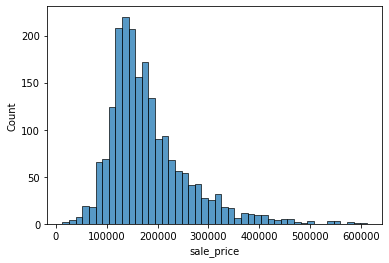

In [55]:
sns.histplot(x = 'sale_price', data = df)

In [56]:
# creating another set of classifiers for sale price for analysis

df['sale_price_classified'] = df['sale_price'].apply(lambda x: 2 if x > 450000 else 1 if ((x < 450000) & (x > 300000)) else 0)

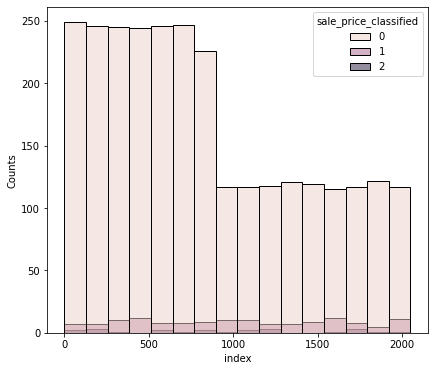

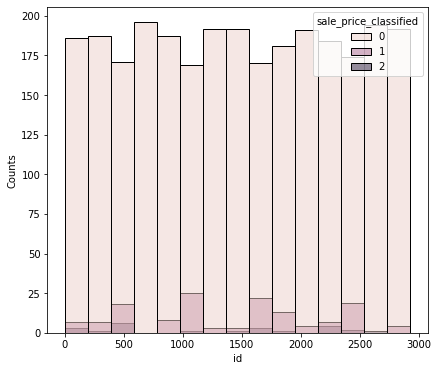

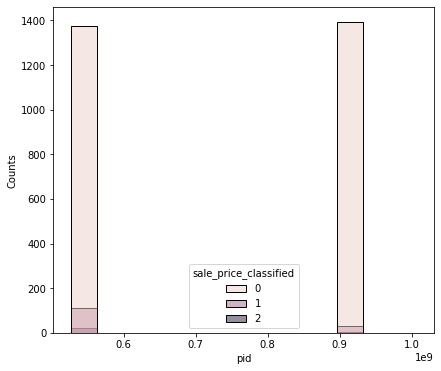

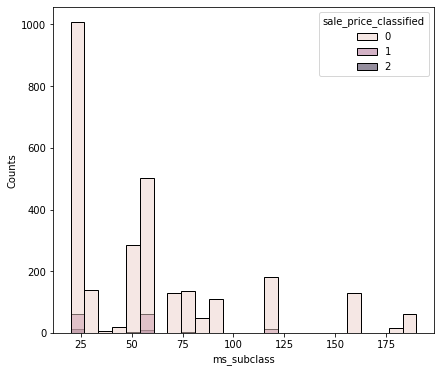

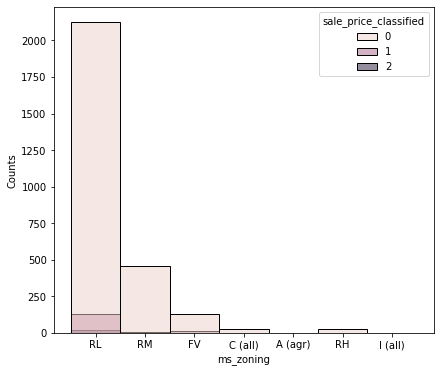

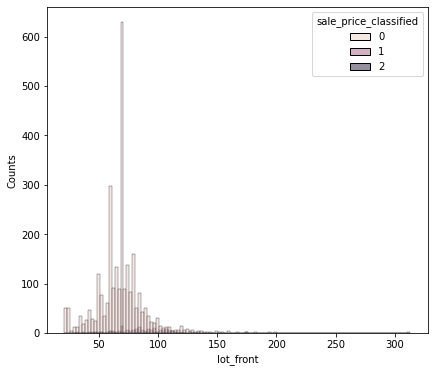

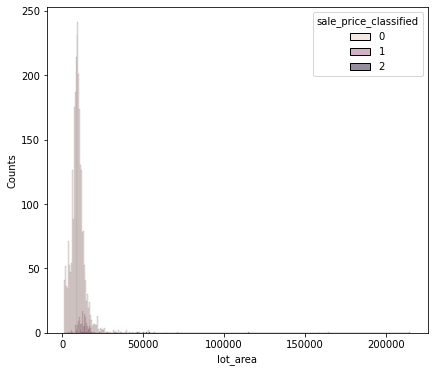

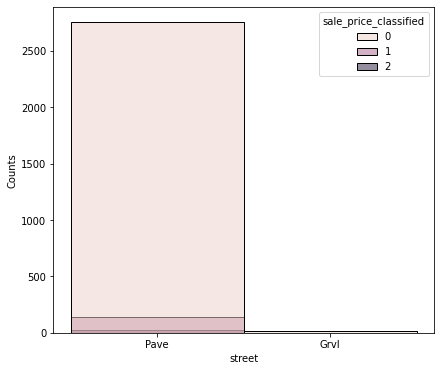

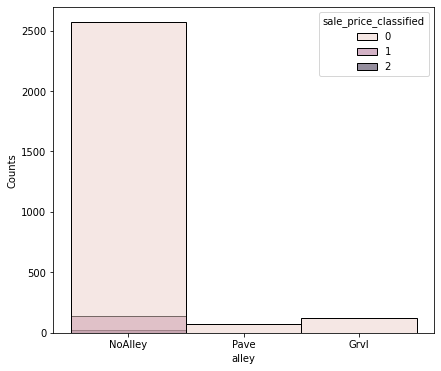

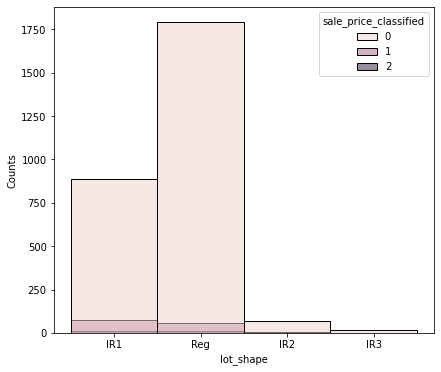

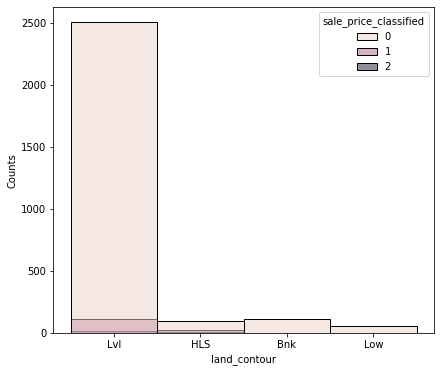

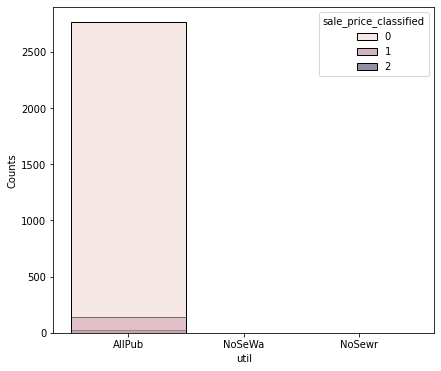

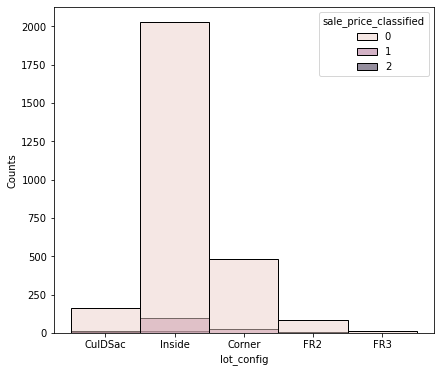

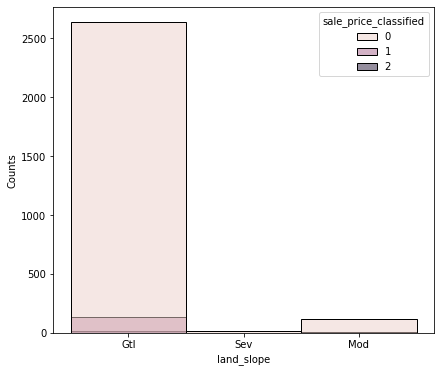

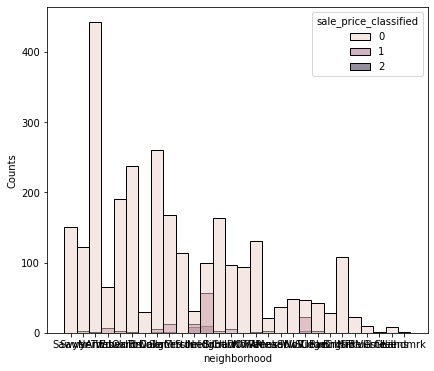

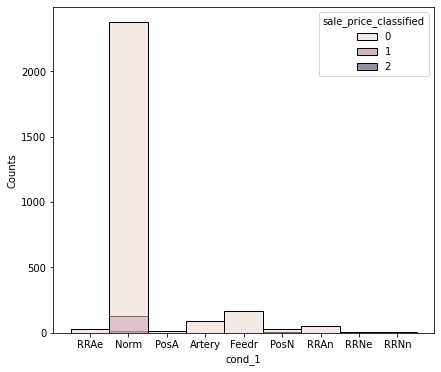

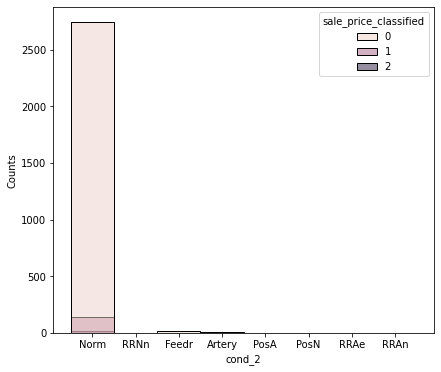

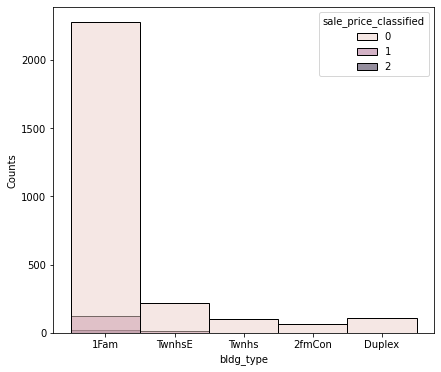

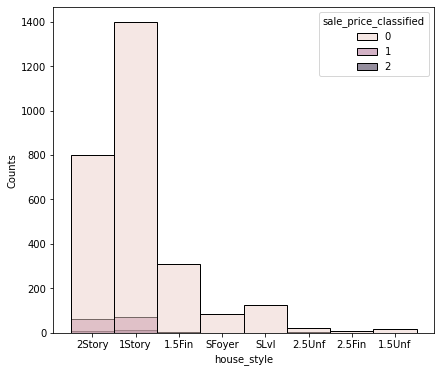

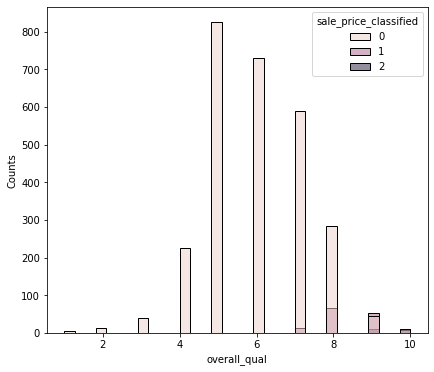

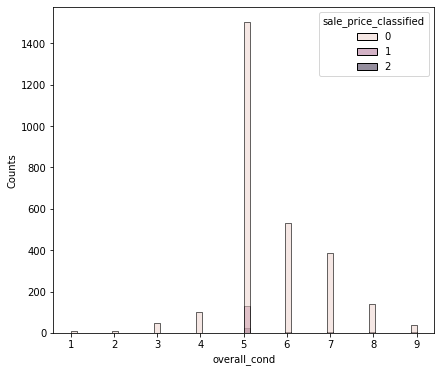

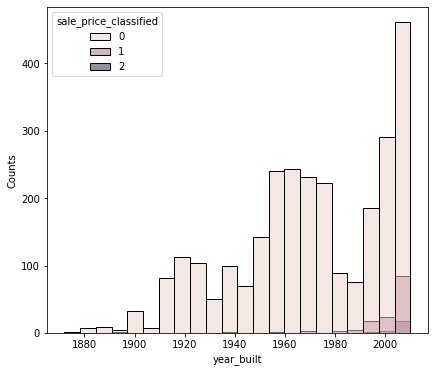

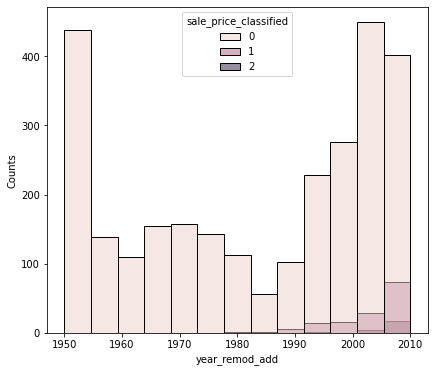

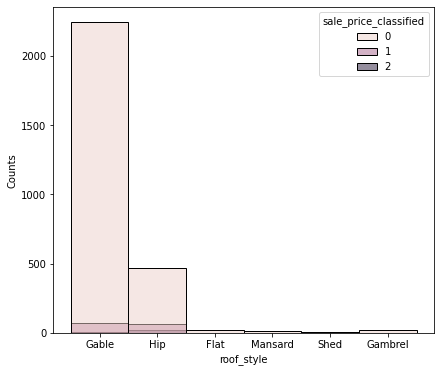

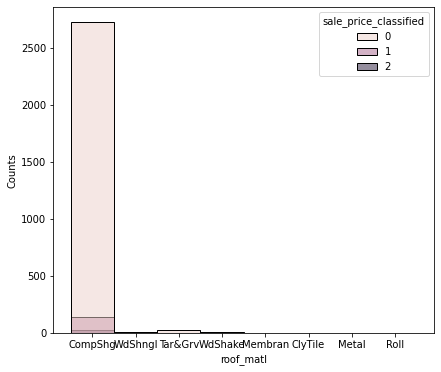

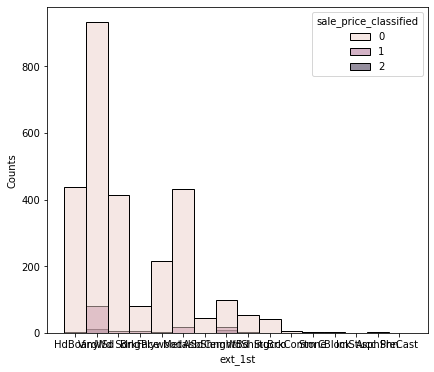

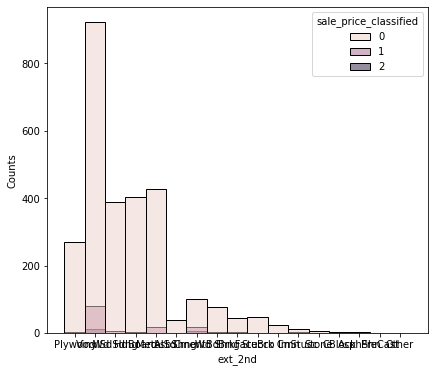

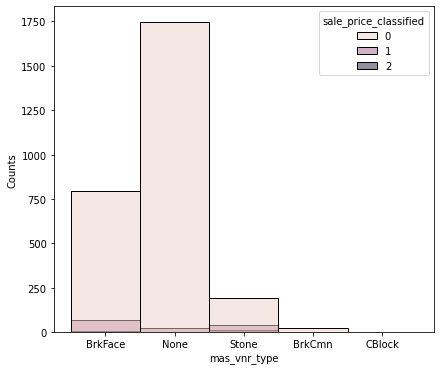

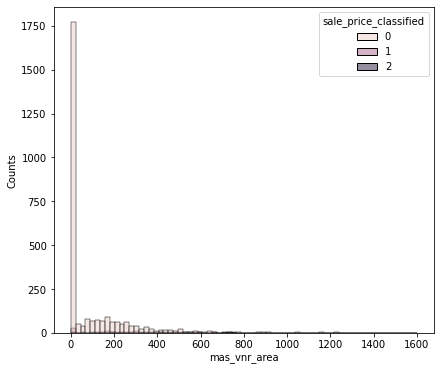

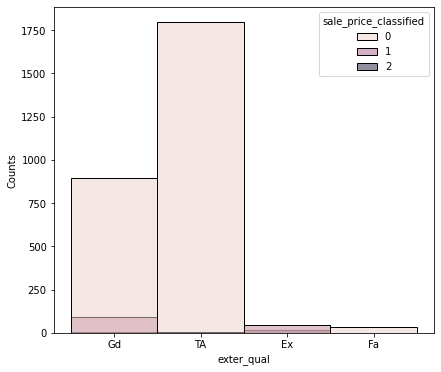

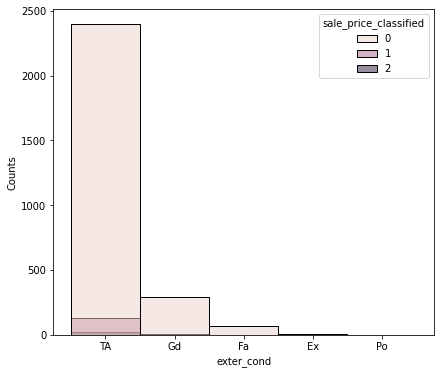

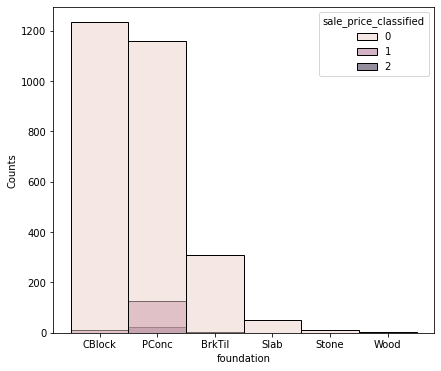

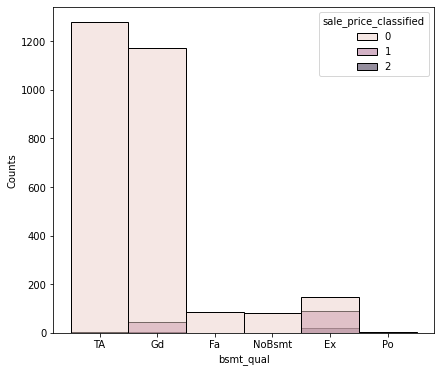

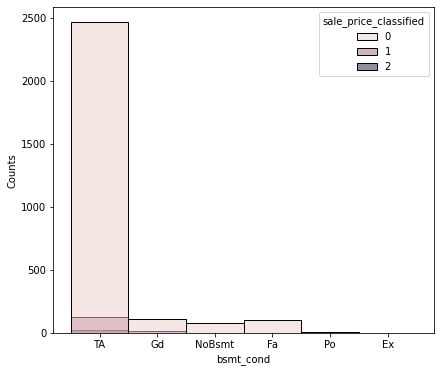

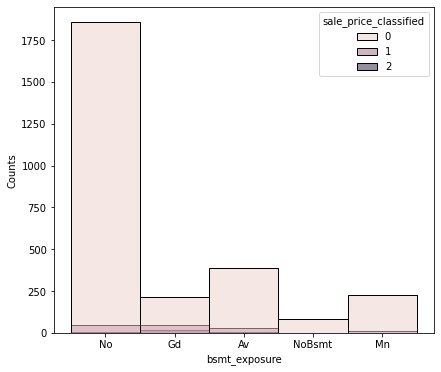

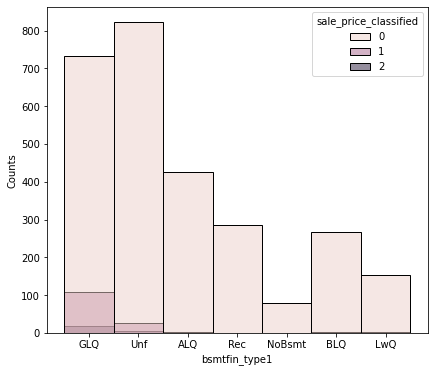

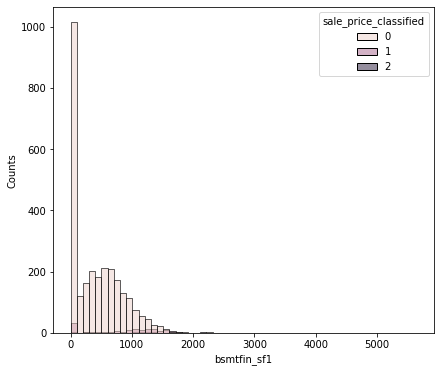

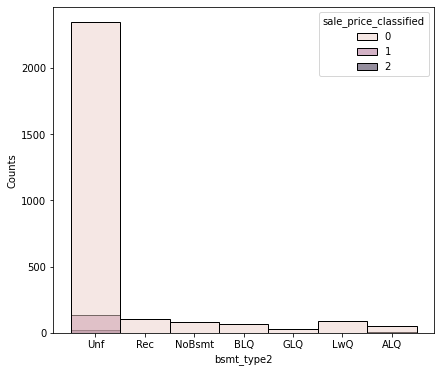

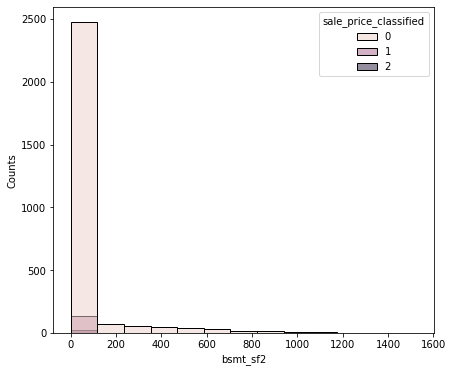

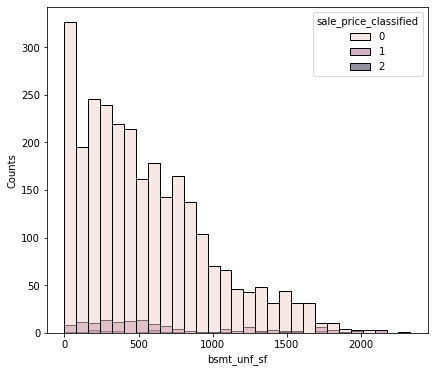

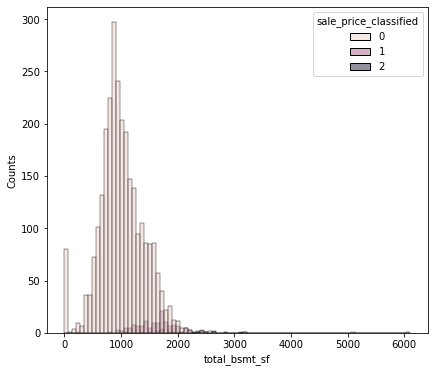

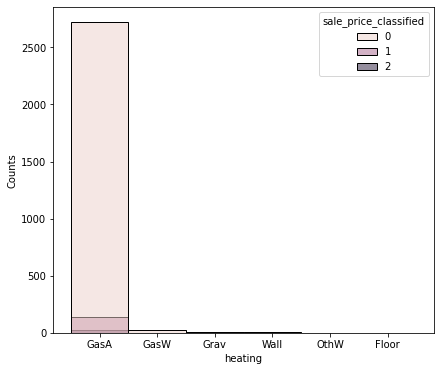

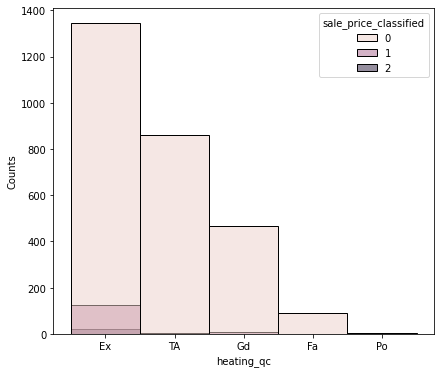

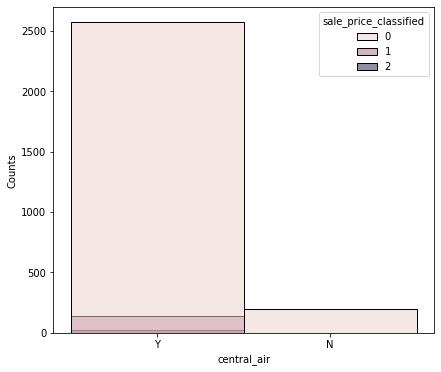

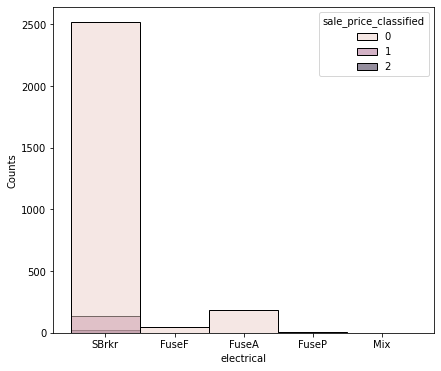

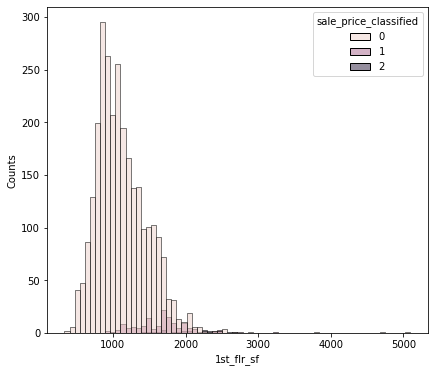

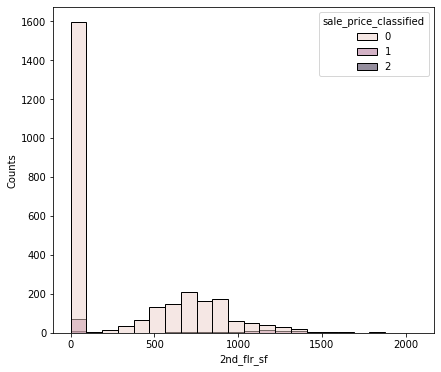

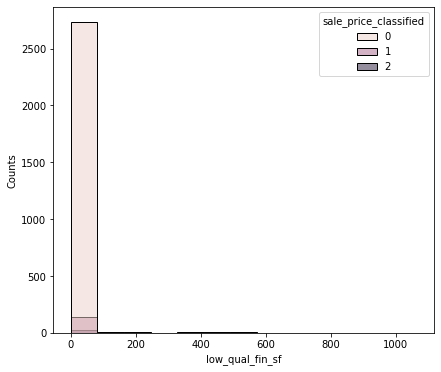

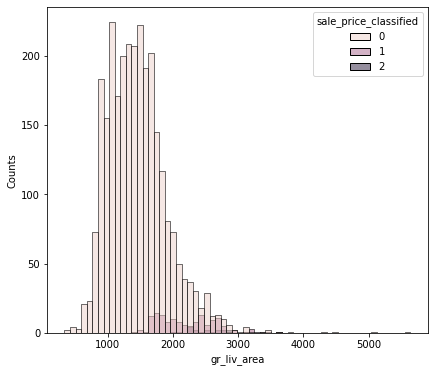

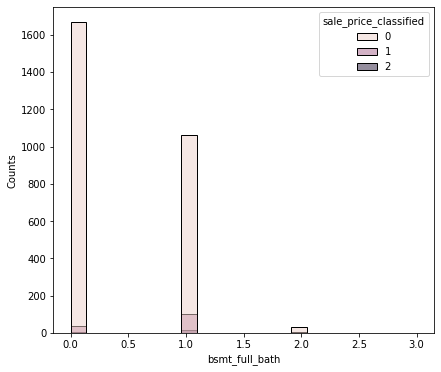

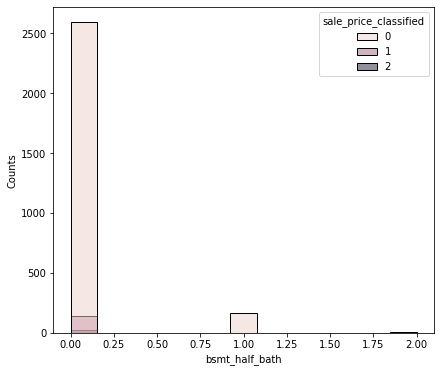

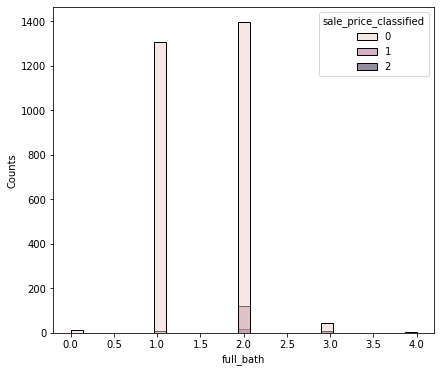

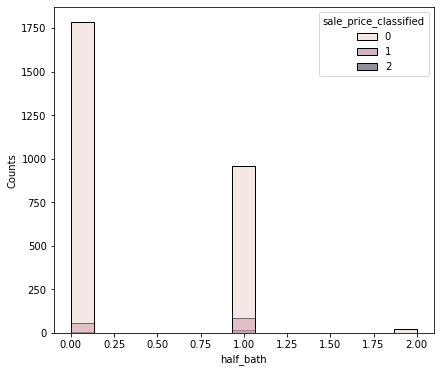

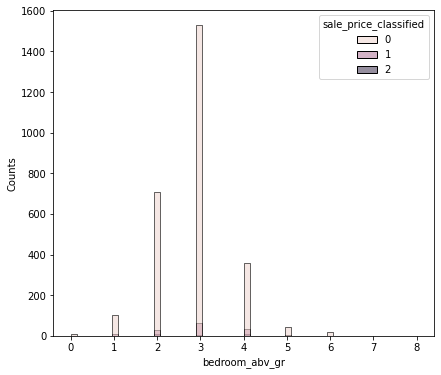

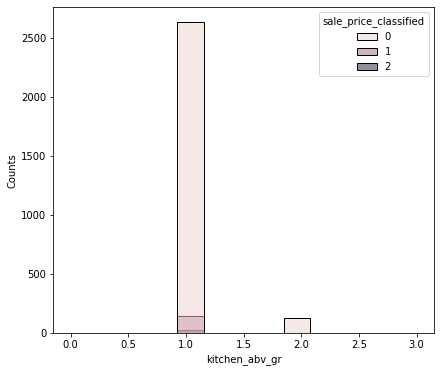

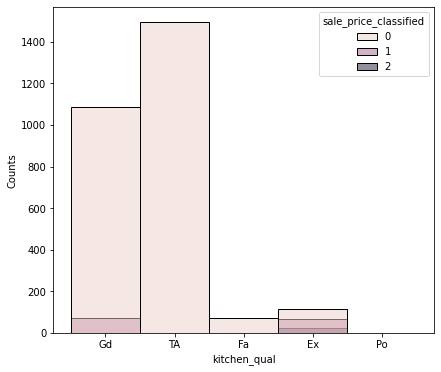

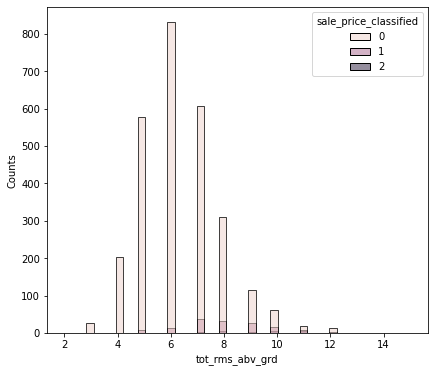

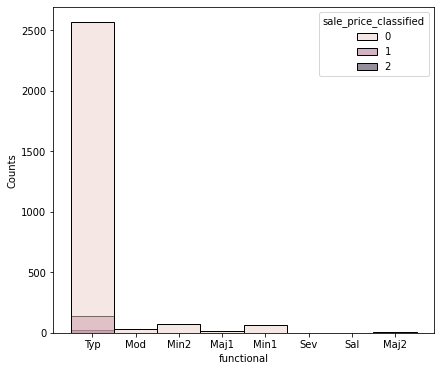

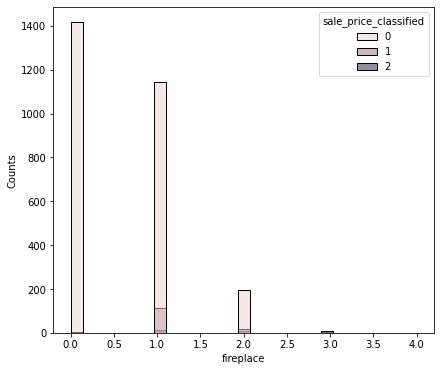

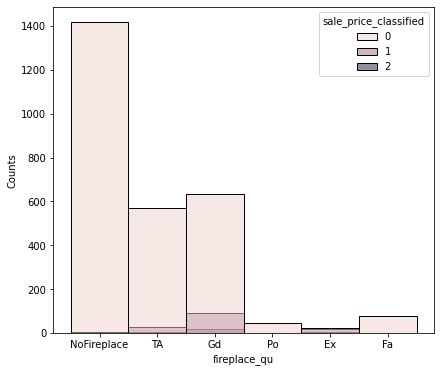

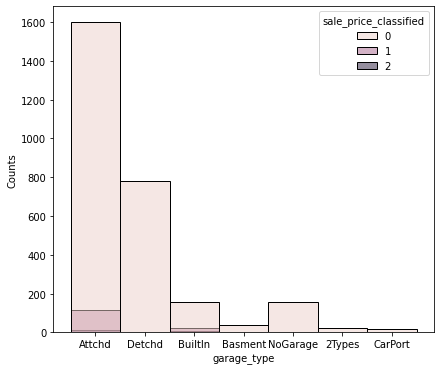

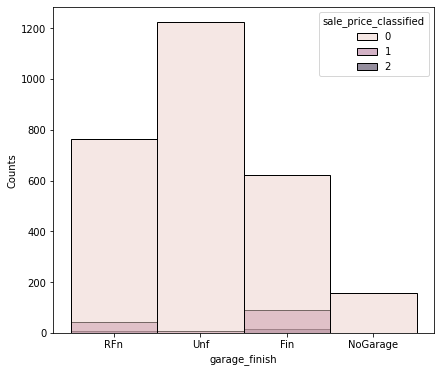

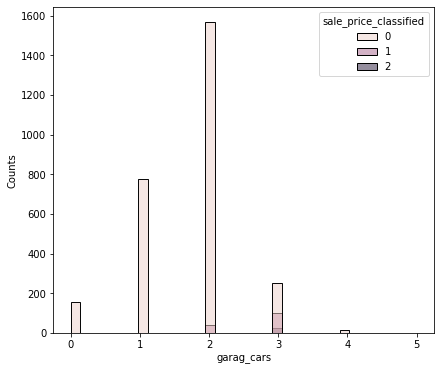

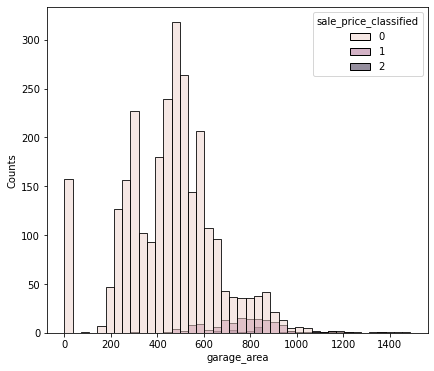

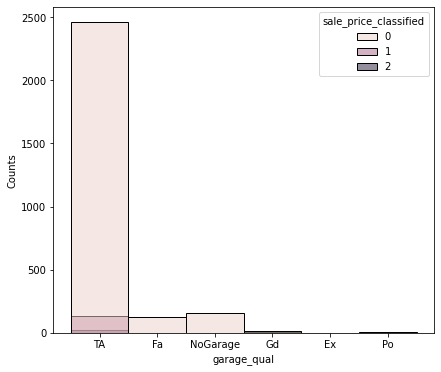

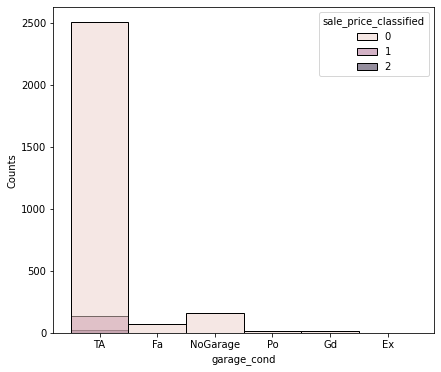

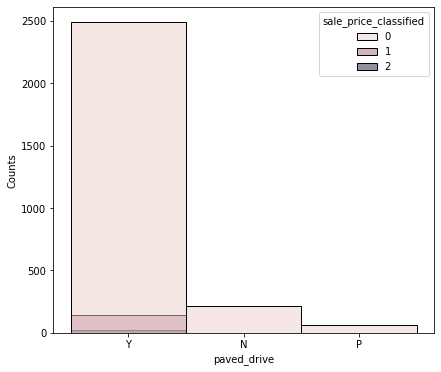

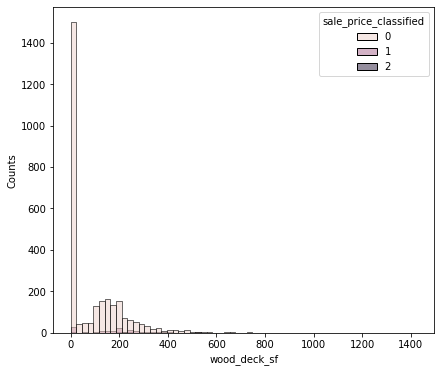

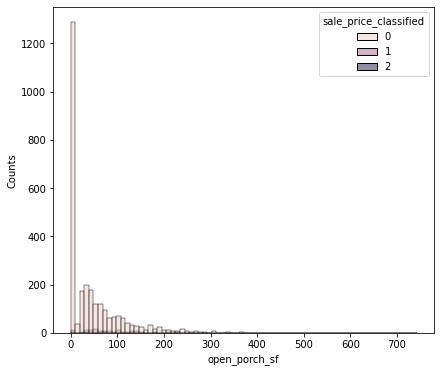

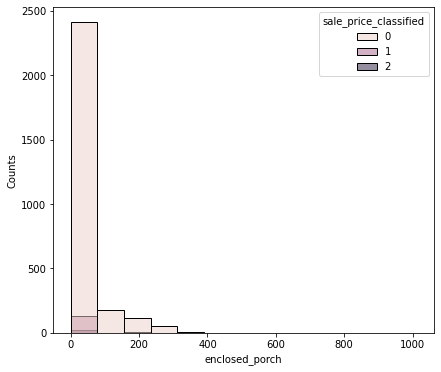

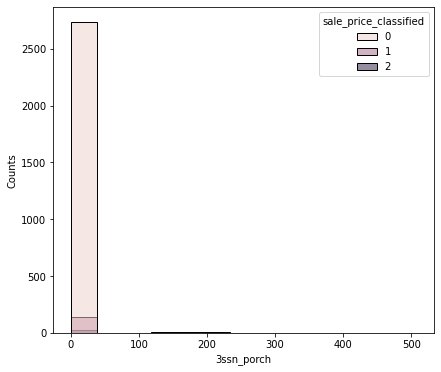

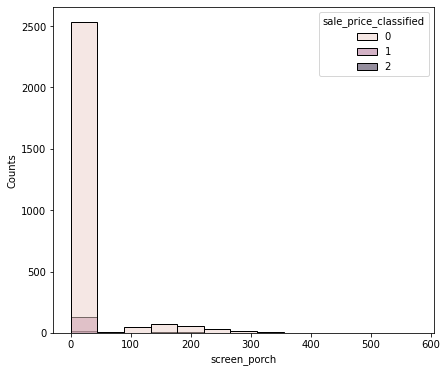

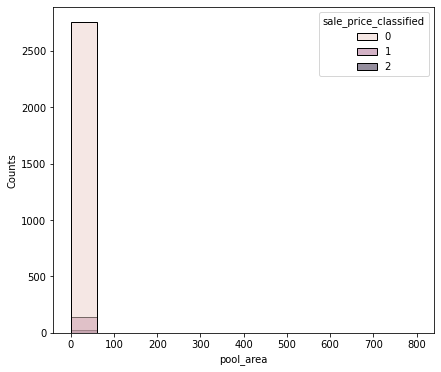

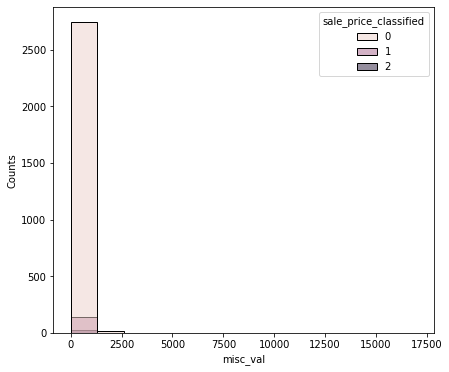

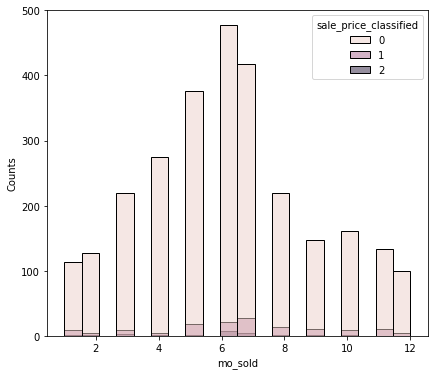

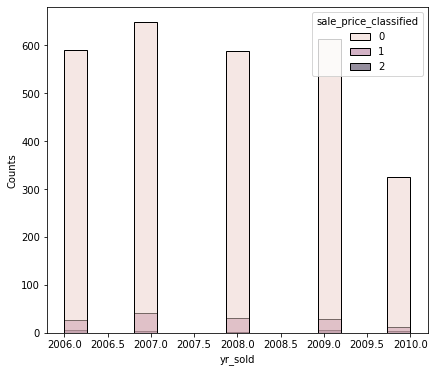

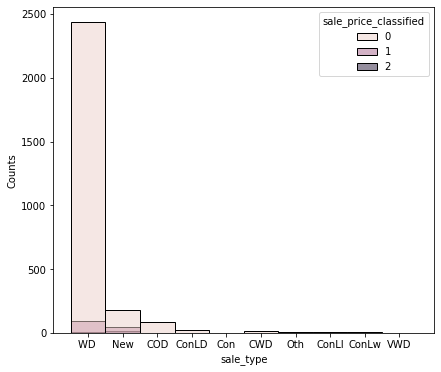

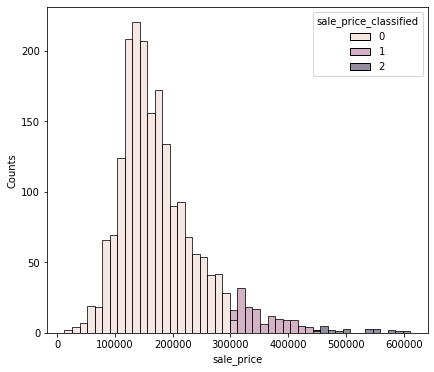

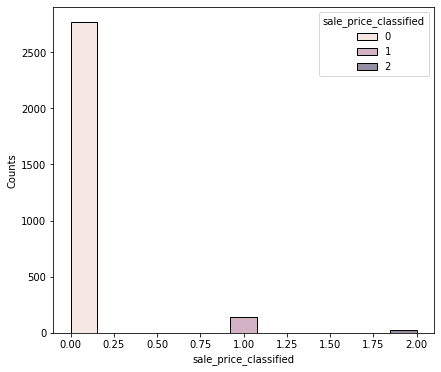

In [57]:
for var in df.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.histplot(x = var, data = df, hue = 'sale_price_classified', color = 'tab10')
    fig.set_title('')
    fig.set_xlabel(var)
    fig.set_ylabel('Counts')

    plt.show()

In [ ]:
# simplifying columns 

df['sale_price_classified'] = df['sale_price'].apply(lambda x: 2 if x > 450000 else 1 if ((x < 450000) & (x > 300000)) else 0)

**Variables not to use/may not use**

id, pid --> no relevance 

ms_subclass, ms_zoning, cond1, cond2, bldg_type,house_style, overall_cond, ext_1st, ext_2nd, mas_vnr_type,mas_vnr_area
bsmt_cond, bsmt_exposure, bsmt_unf_sf, 2nd_Flor_sf, low_qual_fin_sf, bsmt_full_bath,  bsmt_half_bath, full_bath, half_bath, 
bedroom_abv_grd, kitchen_abv_grd , open_porch_sf, wood_deck_sf, 

--> overlaps with higher sale price, nt in order, hence not good 

pave, no alley, lot shape, land_cotour,util, lot_config, land_slope,roof_style, roof_matl,exter_cond,foundation, 
bsmtfin_type1, bsmt_type2, bsmt_sf2, heating, central_air, electrical, paved_drive, 
->> majority classified under low sale price, which may skew predicted price lower 

bsmtfin_sf1 --> good distribution against sale price clsuter, but having cluster even at near zero with high sale price
year_sold --> not much 


**Variables to use**

<!-- 1) lot_front -> distribution is clear against sale price

2) lot_area -> distribution is clear against sale price, but need to take care of above 20000 -->

3) Neighbourhood --> can see clusters of higher cost housing in certain areas

4) Overall_qual --> positively correlated to ordinal cat against sale price

5) year_built --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

6) year_removd_add --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

7) exter_qual --> positively correlated to ordinal cat against sale price, cluster in EX

8) bsmt_qual --> positively correlated to ordinal cat against sale price, cluster in EX

9) heating_qc --> most high end sale price are in ex, need watch for cluster at ex with normal sale price. 
              --> can consider interaction terms with other quals to be more accurate for higher selling price
              
              
10) total_bsmt_sf --> distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

11) 1st_flor_sf -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

12) gv_liv_area-->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

13) kitchen_qual -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

14) garage_finish --> ordinal cat matches with sales prices. 

15) fireplace_qu -> ordinal cat matches with sales prices.

(1000.0, 3000.0)

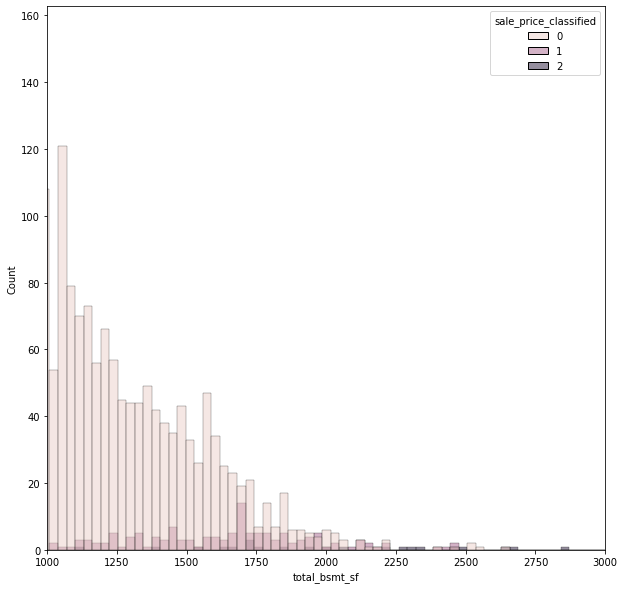

In [58]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'total_bsmt_sf', data = df, hue = 'sale_price_classified', bins =200)

plt.xlim(1000,3000)

In [59]:
df.groupby('sale_price_classified')['total_bsmt_sf'].mean()

sale_price_classified
0    1013.212220
1    1622.128571
2    2060.782609
Name: total_bsmt_sf, dtype: float64

In [60]:
df['total_bsmt_sf_class'] = df['total_bsmt_sf'].map(lambda x: 1 if x > 1700 else 0)

<AxesSubplot:xlabel='neighborhood', ylabel='Count'>

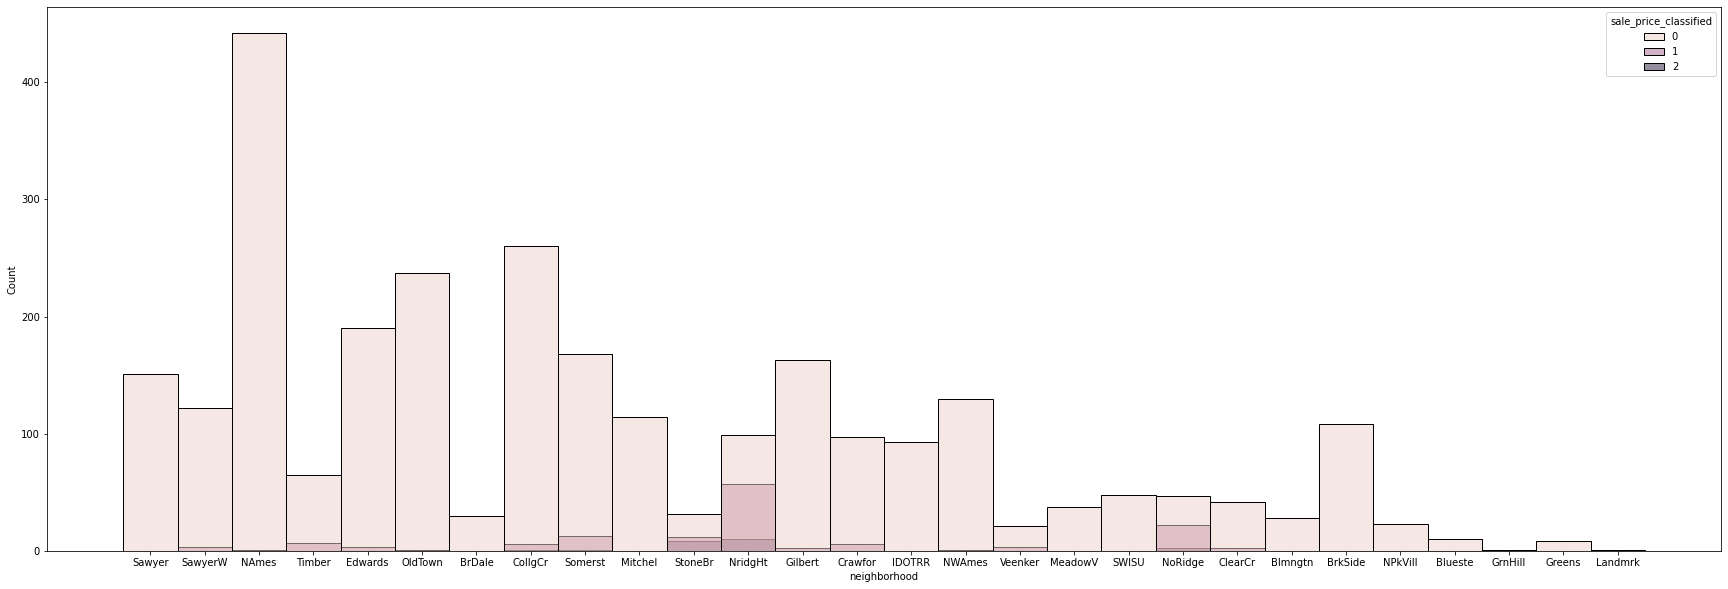

In [61]:
plt.figure(figsize=(30,10))
sns.histplot(x = 'neighborhood', data = df, hue = 'sale_price_classified')

# plt.xlim(1000,3000)

In [62]:
df['neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [68]:
# make new column to exclude the rest of neighbourhood as 0 and Northridge Heights, Stone Brook and Northridge having 1 

df['neighborhood_class'] = df['neighborhood'].map(lambda x: 1 if x in ['StoneBr', 'NridgHt', 'NoRidge'] else 0)

**comments**
1) Northridge Heights, Stone Brook and Northridge has majority high sale price housing


(1000.0, 3000.0)

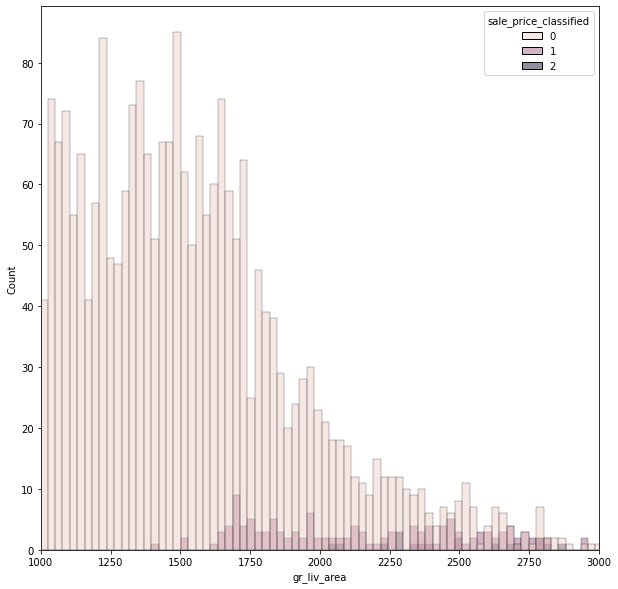

In [69]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'gr_liv_area', data = df, hue = 'sale_price_classified', bins =200)

plt.xlim(1000,3000)

In [70]:
df['gr_liv_area_class'] = df['gr_liv_area'].map(lambda x: 1 if x > 2600 else 0)

### Filter out numerical, and categorical (Ordinal) features 

In [66]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

In [67]:
numerical_features = [col for col in df.columns if df[col].dtype != 'O']

In [126]:
ordinal_cat = ['lot_shape','util','land_slope','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure',
               'bsmtfin_type1','bsmt_type2','electrical','kitchen_qual','functional','fireplace_qu','garage_finish',
               'garage_qual','garage_cond','paved_drive','overall_cond','heating_qc'
]

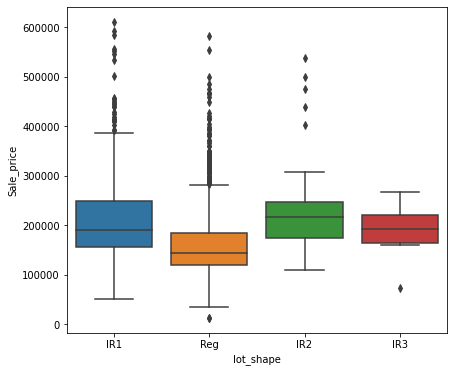

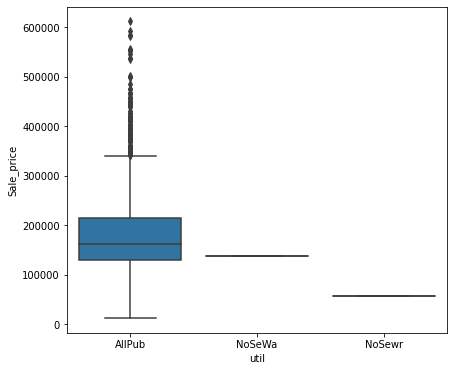

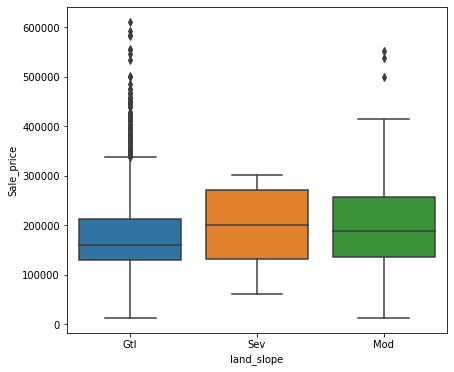

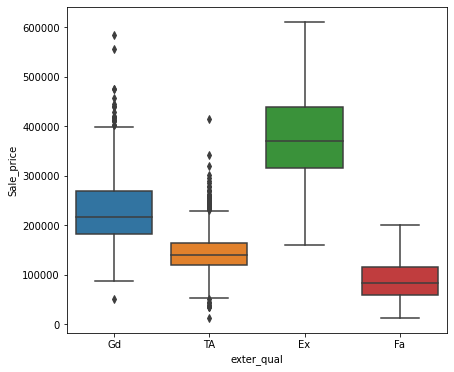

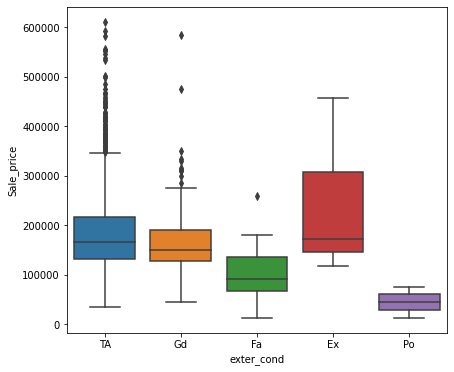

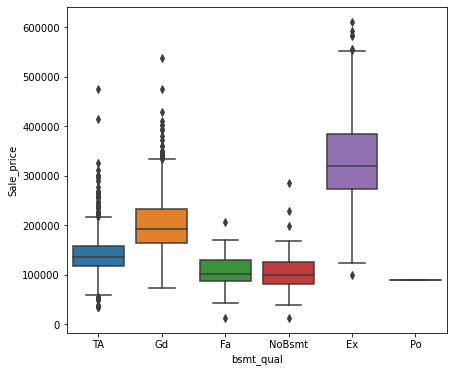

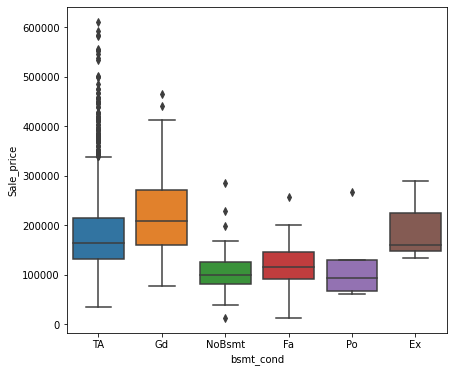

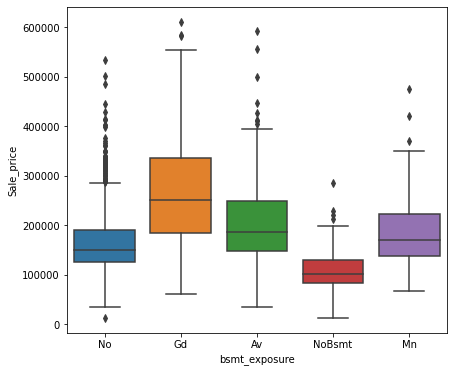

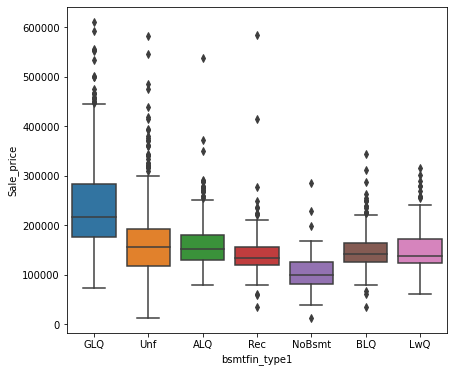

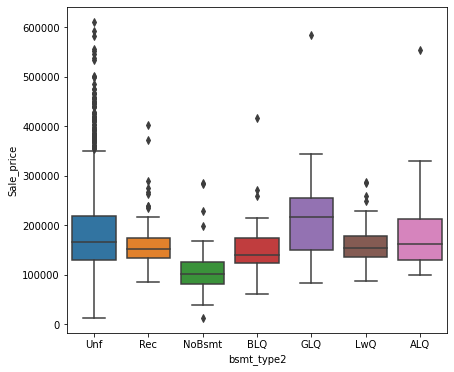

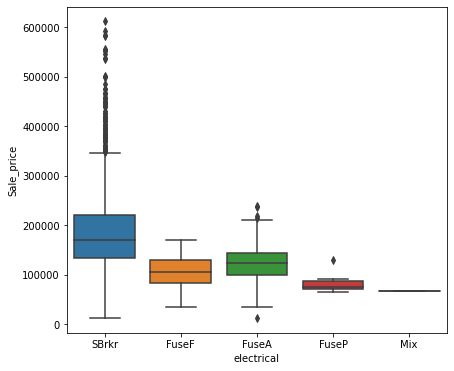

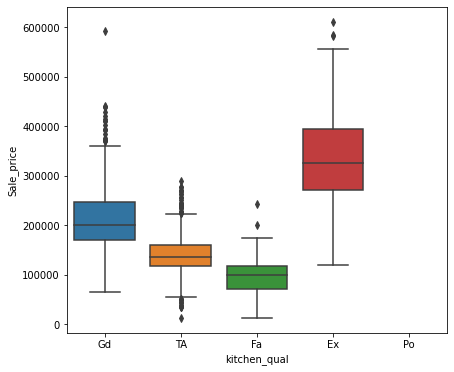

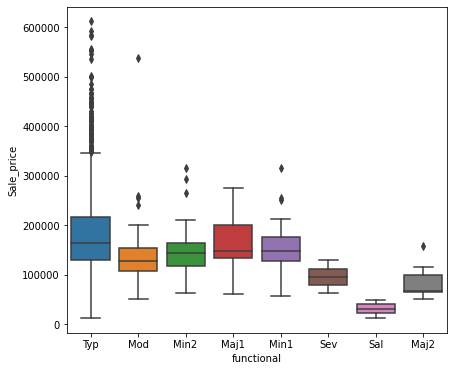

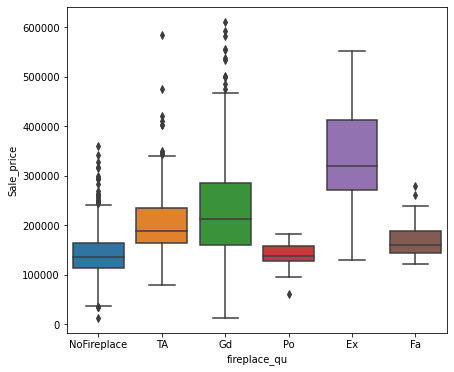

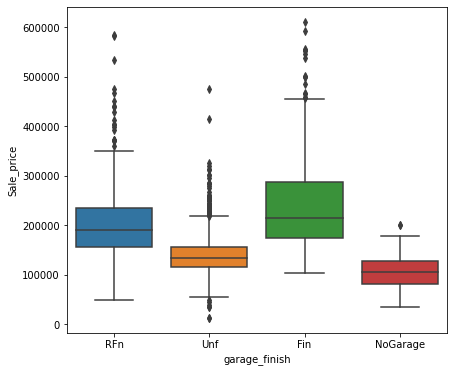

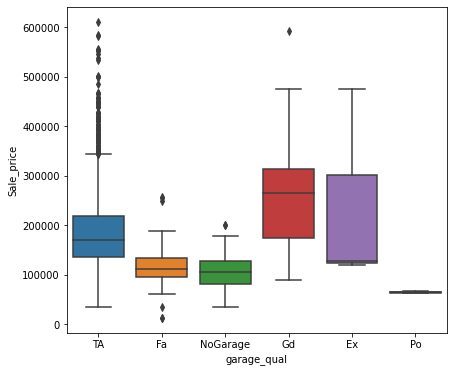

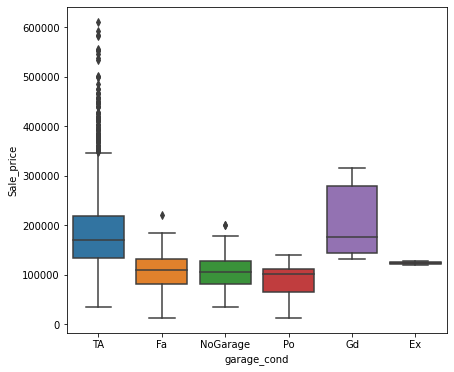

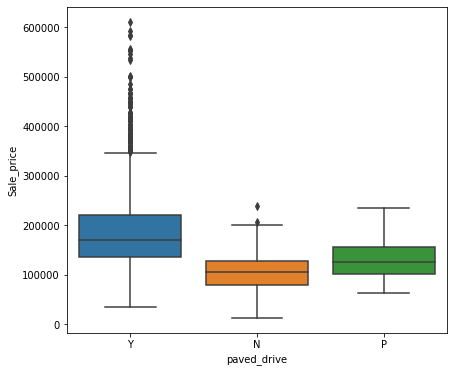

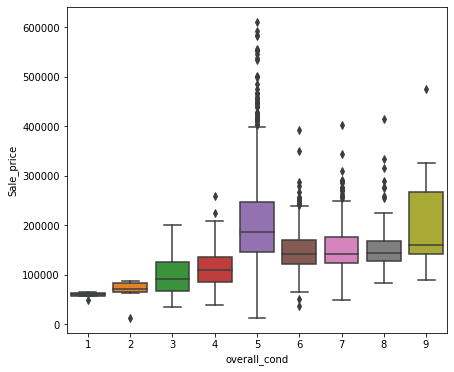

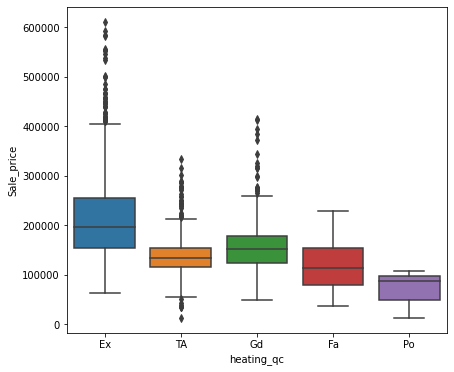

In [127]:
for var in ordinal_cat:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(x = var, y = 'sale_price', data = df)
    fig.set_title('')
    fig.set_xlabel(var)
    fig.set_ylabel('Sale_price')

    plt.show()

In [113]:
# assign 0 to bsmt_full_bath since no basement 
df.loc[df['bsmt_full_bath'].isnull(), 'bsmt_full_bath'] = 0
# assign 0 to bsmt_half_bath since no basement 
df.loc[df['bsmt_half_bath'].isnull(), 'bsmt_half_bath'] = 0

In [114]:
# assign to the most common types for electrical
df.loc[df['electrical'].isnull(), 'electrical'] = df['electrical'].mode()[0]

In [115]:
df.columns

Index(['index', 'id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_front',
       'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'util',
       'lot_config', 'land_slope', 'neighborhood', 'cond_1', 'cond_2',
       'bldg_type', 'house_style', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod_add', 'roof_style', 'roof_matl', 'ext_1st',
       'ext_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual', 'tot_rms_abv_grd',
       'functional', 'fireplace', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garag_cars', 'garage_area', 'garag

*choosing relevant variables for main set of data*

<AxesSubplot:xlabel='gr_liv_area', ylabel='sale_price'>

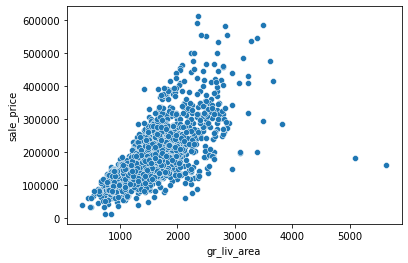

In [116]:
# remove outlier 

sns.scatterplot(
    x = 'gr_liv_area',
    y = 'sale_price',
    data = df
)

In [117]:
# remove outlier 

df = df[df['gr_liv_area'] < 5000]

In [118]:
df.columns

Index(['index', 'id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_front',
       'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'util',
       'lot_config', 'land_slope', 'neighborhood', 'cond_1', 'cond_2',
       'bldg_type', 'house_style', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod_add', 'roof_style', 'roof_matl', 'ext_1st',
       'ext_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual', 'tot_rms_abv_grd',
       'functional', 'fireplace', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garag_cars', 'garage_area', 'garag

In [119]:
area_only = ['lot_front', 'lot_area','total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'sale_price']

main_variables = ['lot_front', 'lot_area', 'overall_qual', 'year_built', 'year_remod_add',
 'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
 'kitchen_qual', 'garage_finish', 'fireplace_qu', 'total_bsmt_sf_class', 'neighborhood_class', 'gr_liv_area_class', 'sale_price']

other_columns = [col for col in df.columns if (col not in main_variables) & (col not in ['index','id','pid'])]


In [120]:
df.shape

(2927, 82)

In [121]:
# Change other columns to get dummies 

other_df = df.copy()[other_columns]

other_cat_features = [col for col in other_df.columns if df[col].dtype == 'O']
other_numerical_features = [col for col in other_df.columns if df[col].dtype != 'O']


other_cat = pd.get_dummies(data = other_df[other_cat_features])
other_num = other_df[other_numerical_features]

other_df = pd.concat([other_num,other_cat], axis = 1)
other_df

ms_subclass  overall_cond  mas_vnr_area  bsmtfin_sf1  bsmt_sf2  \
0              60             8         289.0        533.0       0.0   
1              60             5         132.0        637.0       0.0   
2              20             7           0.0        731.0       0.0   
3              60             5           0.0          0.0       0.0   
4              50             8           0.0          0.0       0.0   
...           ...           ...           ...          ...       ...   
2924           60             6           0.0        931.0     153.0   
2925           60             7         410.0        575.0       0.0   
2926           20             5           0.0        250.0     492.0   
2927           20             6           0.0        616.0       0.0   
2928           20             5           0.0        793.0       0.0   

      bsmt_unf_sf  2nd_flr_sf  low_qual_fin_sf  bsmt_full_bath  \
0           192.0         754                0             0.0   
1           276.0        1209                0             1.0   
2           326.0           0                0             1.0   
3           384.0         700                0             0.0   
4           676.0         614                0             0.0   
...           ...         ...              ...             ...   
2924          0.0         793                0             1.0   
2925        529.0         884                0             0.0   
2926        210.0           0                0             0.0   
2927        248.0           0                0             0.0   
2928        130.0           0                0             1.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abv_gr  kitchen_abv_gr  \
0                0.0          2          1               3               1   
1                0.0          2          1               4               1   
2                0.0          1          0               3               1   
3                0.0          2          1               3               1   
4                0.0          2          0               3               1   
...              ...        ...        ...             ...             ...   
2924             0.0          2          1               4               1   
2925             0.0          2          1               4               1   
2926             0.0          1          0               3               1   
2927             0.0          1          0               3               1   
2928             0.0          1          0               3               1   

      tot_rms_abv_grd  fireplace  garag_cars  garage_area  wood_deck_sf  \
0                   6          0         2.0        475.0             0   
1                   8          1         2.0        559.0             0   
2                   5          0         1.0        246.0             0   
3                   7          0         2.0        400.0           100   
4                   6          0         2.0        484.0             0   
...               ...        ...         ...          ...           ...   
2924                8          1         2.0        488.0             0   
2925                9          1         2.0        480.0             0   
2926                5          1         1.0        322.0             0   
2927                5          0         2.0        528.0             0   
2928                5          2         1.0        390.0            81   

      open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
0                44               0           0             0          0   
1                74               0           0             0          0   
2                52               0           0             0          0   
3                 0               0           0             0          0   
4                59               0           0             0          0   
...             ...             ...         ...       

In [122]:
# main data to do faeture engineering 
main_data = df.copy()

In [123]:
main_data = main_data[main_variables]

In [124]:
main_data

lot_front  lot_area  overall_qual  year_built  year_remod_add  \
0     69.199672     13517             6        1976            2005   
1     43.000000     11492             7        1996            1997   
2     68.000000      7922             5        1953            2007   
3     73.000000      9802             5        2006            2007   
4     82.000000     14235             6        1900            1993   
...         ...       ...           ...         ...             ...   
2924  80.000000      8000             6        1974            1974   
2925  90.000000     14670             6        1966            1999   
2926  55.000000      8250             5        1968            1968   
2927  60.000000      9000             4        1971            1971   
2928  70.000000      8400             5        1955            1955   

     exter_qual bsmt_qual heating_qc  total_bsmt_sf  1st_flr_sf  gr_liv_area  \
0            Gd        TA         Ex          725.0         725         1479   
1            Gd        Gd         Ex          913.0         913         2122   
2            TA        TA         TA         1057.0        1057         1057   
3            TA        Gd         Gd          384.0         744         1444   
4            TA        Fa         TA          676.0         831         1445   
...         ...       ...        ...            ...         ...          ...   
2924         TA        TA         TA         1084.0        1084         1877   
2925         Gd        TA         Ex         1104.0        1104         1988   
2926         TA        TA         Ex          952.0        1211         1211   
2927         TA        TA         TA          864.0         864          864   
2928         TA        TA         TA          923.0         925          925   

     kitchen_qual garage_finish fireplace_qu  total_bsmt_sf_class  \
0              Gd           RFn  NoFireplace                    0   
1              Gd           RFn           TA                    0   
2              Gd           Unf  NoFireplace                    0   
3              TA           Fin  NoFireplace                    0   
4              TA           Unf  NoFireplace                    0   
...           ...           ...          ...                  ...   
2924           TA           Unf           TA                    0   
2925           Gd           RFn           Gd                    0   
2926           TA           Unf           TA                    0   
2927           TA           Unf  NoFireplace                    0   
2928           TA           Unf           TA                    0   

      neighborhood_class  gr_liv_area_class  sale_price  
0                      0                  0    130500.0  
1                      0                  0    220000.0  
2                      0                  0    109000.0  
3                      0                  0    174000.0  
4                      0                  0    138500.0  
...                  ...                ...         ...  
2924                   0                  0         NaN  
2925                   0                  0         NaN  
2926                   0                  0         NaN  
2927                   0                  0         NaN  
2928                   0                  0         NaN  

[2927 rows x 18 columns]

In [125]:
# defining a function to return rate
def rate_Po_Excellent(col):
    rate_dict = {'NoBsmt': 0,'NoFireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    
    return rate_dict[col]

In [126]:
main_data['fireplace_qu'].unique()

array(['NoFireplace', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [127]:
main_data['kitchen_qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype=object)

In [128]:
main_data['heating_qc'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [129]:
main_data['bsmt_qual'].unique()

array(['TA', 'Gd', 'Fa', 'NoBsmt', 'Ex', 'Po'], dtype=object)

In [130]:
# assign ordinal score to these columns 

main_data['exter_qual'] = main_data['exter_qual'].map(rate_Po_Excellent)
main_data['bsmt_qual'] = main_data['bsmt_qual'].map(rate_Po_Excellent)
main_data['kitchen_qual'] = main_data['kitchen_qual'].map(rate_Po_Excellent)
main_data['heating_qc'] = main_data['heating_qc'].map(rate_Po_Excellent)
main_data['fireplace_qu'] = main_data['fireplace_qu'].map(rate_Po_Excellent)

In [131]:
# create dict for garage finish  
garage_fin_dict = {'NoGarage':0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

In [132]:
main_data['garage_finish'] = main_data['garage_finish'].map(garage_fin_dict)

In [133]:
# creating interaction terms 

main_data['interaction_1'] = main_data['year_built'] * main_data['gr_liv_area']**0.5 * main_data['exter_qual'] * main_data['bsmt_qual'] \
* main_data['kitchen_qual'] * main_data['garage_finish'] * main_data['1st_flr_sf']**0.5 * main_data['lot_area']**0.5 \
* main_data['fireplace_qu'] * main_data['total_bsmt_sf']**0.5 * main_data['lot_front']**0.5

<AxesSubplot:xlabel='interaction_1', ylabel='sale_price'>

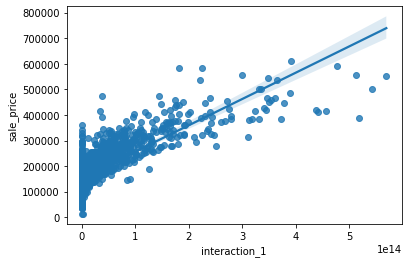

In [134]:
sns.regplot(
    x = 'interaction_1',
    y = 'sale_price',
    data = main_data

)

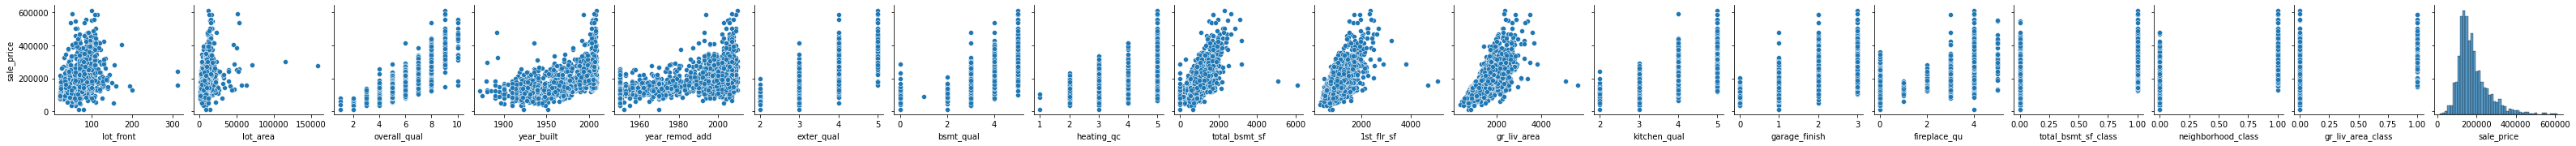

In [110]:
sns.pairplot(
    x_vars = main_variables,
    y_vars = 'sale_price',
    data = main_data

)

In [261]:
# combine main_data with others 

test_df = pd.concat([main_data, other_df], axis = 1)

In [288]:
# split test data (Kaggle)

kaggle_test_final = test_df[2049:]
kaggle_test_final.reset_index(drop = 'index').head()


lot_front  lot_area  overall_qual  year_built  year_remod_add  exter_qual  \
0  69.000000      9142             6        1910            1950           3   
1  69.199672      9662             5        1977            1977           3   
2  58.000000     17104             7        2006            2006           4   
3  60.000000      8520             5        1923            2006           4   
4  69.199672      9500             6        1963            1963           3   

   bsmt_qual  heating_qc  total_bsmt_sf  1st_flr_sf  gr_liv_area  \
0          2           4         1020.0         908         1928   
1          4           3         1967.0        1967         1967   
2          4           5          654.0         664         1496   
3          3           3          968.0         968          968   
4          4           4         1394.0        1394         1394   

   kitchen_qual  garage_finish  fireplace_qu  total_bsmt_sf_class  \
0             2              1             0                    0   
1             3              3             0                    1   
2             4              2             4                    0   
3             3              1             0                    0   
4             3              2             4                    0   

   neighborhood_class  gr_liv_area_class  sale_price  interaction_1  \
0                   0                  0         NaN   0.000000e+00   
1                   0                  0         NaN   0.000000e+00   
2                   0                  0         NaN   2.607369e+13   
3                   0                  0         NaN   0.000000e+00   
4                   0                  0         NaN   2.385727e+13   

   ms_subclass  overall_cond  mas_vnr_area  bsmtfin_sf1  bsmt_sf2  \
0          190             8           0.0          0.0       0.0   
1           90             4           0.0          0.0       0.0   
2           60             5           0.0        554.0       0.0   
3           30             6           0.0          0.0       0.0   
4           20             5         247.0        609.0       0.0   

   bsmt_unf_sf  2nd_flr_sf  low_qual_fin_sf  bsmt_full_bath  bsmt_half_bath  \
0       1020.0        1020                0             0.0             0.0   
1       1967.0           0                0             0.0             0.0   
2        100.0         832                0             1.0             0.0   
3        968.0           0                0             0.0             0.0   
4        785.0           0                0             1.0             0.0   

   full_bath  half_bath  bedroom_abv_gr  kitchen_abv_gr  tot_rms_abv_grd  \
0          2          0               4               2                9   
1          2          0               6               2               10   
2          2          1               3               1                7   
3          1          0               2               1                5   
4          1          1               3               1                6   

   fireplace  garag_cars  garage_area  wood_deck_sf  open_porch_sf  \
0          0         1.0        440.0             0             60   
1          0         2.0        580.0           170              0   
2          1         2.0        426.0           100             24   
3          0         2.0        480.0             0              0   
4          2         2.0        514.0             0             76   

   enclosed_porch  3ssn_porch  screen_porch  pool_area  misc_val  mo_sold  \
0             112           0             0          0         0        4   
1               0           0             0          0         0        8   
2               0           0             0          0         0        9   
3             184           0             0          0         0        7   
4               0           0           185          0         0        7   

   yr_sold  sale_price_classified  ms_zo

In [289]:
# split train data (Kaggle)

kaggle_train_final = test_df[:2049]

## Pre - processing

**Apply Standard Scaler**

In [203]:
kaggle_train_final.columns

Index(['lot_front', 'lot_area', 'overall_qual', 'year_built', 'year_remod_add',
       'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf',
       ...
       'sale_type_COD', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD',
       'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth',
       'sale_type_VWD', 'sale_type_WD '],
      dtype='object', length=276)

In [206]:
# drop sale_classified 

kaggle_train_final.drop(columns = 'sale_price_classified', inplace = True)

In [207]:
# assign X and y

X = kaggle_train_final.drop(columns = ['sale_price'])
y = kaggle_train_final['sale_price']


# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Modelling

**Linear Regression - First pass**

In [208]:
lr = LinearRegression()

lr.fit(X_train,y_train)

# cross val mse
cross_score = - cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lr.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 2.4185806967178667e+34
MSE for test: 2.0120680169461816e+29
Underfited by: 2.4185605760376973e+34
RMSE: 448560811590377.5


In [ ]:
MSE for train: 705189115.4970307
MSE for test: 588323843.5450833
Underfited by: 116865271.95194745
RMSE: 24255.387928150794

MemoryError: Unable to allocate 15.0 TiB for an array with shape (2067552254253,) and data type float64

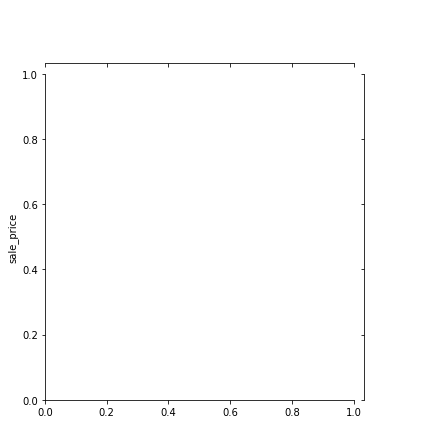

In [146]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lr.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

**Lasso Regression**

In [209]:
# initiate 
lasso = LassoCV(
    cv=5,
    max_iter=50000,
    n_alphas=200,
)

# Fit model using best ridge alpha!
lasso.fit(X_train, y_train);


lasso.alpha_

386.23588019075066

In [210]:
lasso_best = Lasso(alpha = lasso.alpha_)

In [211]:
# fit lasso best 

lasso_best.fit(X_train,y_train)

Lasso(alpha=386.23588019075066)

In [212]:
# cross val mse
cross_score = - cross_val_score(
    lasso_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 530684328.1900993
MSE for test: 383629927.10110044
Underfited by: 147054401.08899885
RMSE: 19586.47306436512


Text(27.125, 0.5, 'Actual Sale Price')

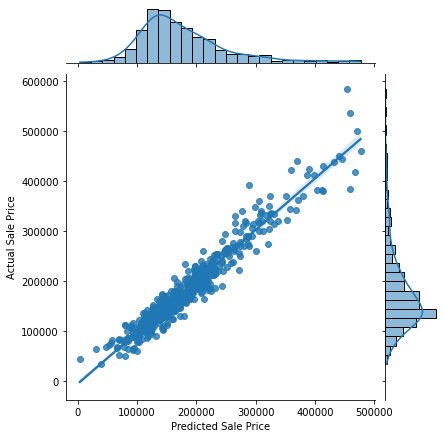

In [213]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lasso_best.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

In [214]:
lasso_best.predict(X_test).max()

476941.9645602624

In [215]:
kaggle_train_final.columns

Index(['lot_front', 'lot_area', 'overall_qual', 'year_built', 'year_remod_add',
       'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf',
       ...
       'sale_type_COD', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD',
       'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth',
       'sale_type_VWD', 'sale_type_WD '],
      dtype='object', length=275)

<AxesSubplot:>

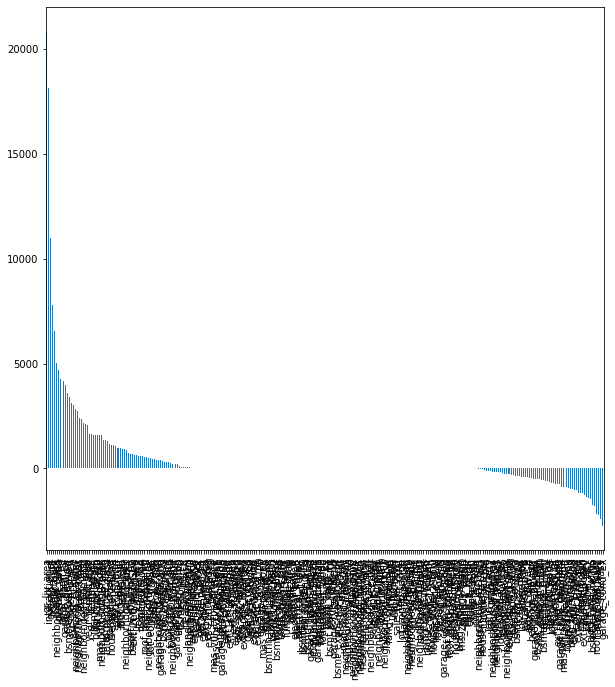

In [216]:
# hwo to plot the series 
plt.figure(figsize=(10,10))

col = kaggle_train_final.columns.drop('sale_price')
pd.Series(lasso_best.coef_, index = col).sort_values(ascending = False).plot.bar()

In [217]:
# find out index 339 having anomaly 
anomaly = {num: val for num,val in enumerate (lasso_best.predict(X_test)>638000) if val == True}
anomaly

{}

In [218]:
y_test.values[339]

156000.0

In [219]:
# find out other similar prices with 160000
{num: val for num,val in enumerate (y_test == y_test.values[339]) if val == True}

{312: True, 339: True}

In [220]:
Ab_val= pd.DataFrame(X_test[339])
val1= pd.DataFrame(X_test[31])
val2= pd.DataFrame(X_test[286])

In [221]:
Ab_val.shape

(274, 1)

In [222]:
val1.shape

(274, 1)

In [223]:
val2.shape

(274, 1)

In [224]:
sample = pd.concat([Ab_val,val1,val2], axis = 1)
sample.columns = ['Ab', 'norm1', 'norm2']

In [225]:
# True outlier compared to two other rows with similar coefficients against sale price

sample.sort_values(by = 'Ab', ascending = False)

Ab     norm1     norm2
207  2.483948  2.483948 -0.402585
171  2.387663 -0.418820  2.387663
91   2.381127  2.381127 -0.419969
155  2.368184 -0.422265  2.368184
137  2.021165 -0.494764 -0.494764
181  1.533123 -0.652263  1.533123
19   1.344110  2.262383  0.425838
29   1.236298 -0.746757 -0.746757
191  1.194318  1.194318 -0.837298
26   1.100349  1.100349  1.100349
128  0.953653  0.953653  0.953653
21   0.864283 -0.111279  1.107060
243  0.813416 -1.229383  0.813416
60   0.781816  0.781816  0.781816
205  0.733912  0.733912 -1.362561
72   0.616582  0.616582  0.616582
50   0.527328  0.527328  0.527328
0    0.474901 -0.435943 -0.435943
121  0.450578  0.450578  0.450578
220  0.414208 -2.414243  0.414208
20   0.410972 -0.563446 -0.563446
106  0.404921  0.404921  0.404921
189  0.403754  0.403754  0.403754
273  0.390811  0.390811 -2.558783
201  0.351887  0.351887  0.351887
64   0.339243  0.339243 -2.947743
254  0.335396  0.335396  0.335396
233  0.307663  0.307663  0.307663
263  0.298057  0.298057  0.298057
260  0.296668  0.296668  0.296668
12   0.296517  0.296517  0.296517
241  0.275262  0.275262  0.275262
34   0.273666  0.273666  0.273666
228  0.272318  0.272318  0.272318
55   0.267860  0.267860  0.267860
73   0.238208  0.238208  0.238208
30   0.198961  0.198961 -1.009979
35   0.170194  1.130476  0.413778
140  0.121910  0.121910  0.121910
115  0.115877  0.115877  0.115877
222  0.112747  0.112747  0.112747
53   0.059152  0.059152  0.059152
8    0.033079 -0.450317  0.833342
65   0.026417  0.026417  0.026417
1    0.008911 -0.412379 -0.291134
172  0.000000  0.000000  0.000000
221  0.000000  0.000000  0.000000
157  0.000000  0.000000  0.000000
174  0.000000  0.000000  0.000000
66   0.000000  0.000000  0.000000
141  0.000000  0.000000  0.000000
143  0.000000  0.000000  0.000000
142  0.000000  0.000000  0.000000
269  0.000000  0.000000  0.000000
88   0.000000  0.000000  0.000000
272  0.000000  0.000000  0.000000
182  0.000000  0.000000  0.000000
86  -0.026417 -0.026417 -0.026417
117 -0.026417 -0.026417 -0.026417
253 -0.026417 -0.026417 -0.026417
225 -0.026417 -0.026417 -0.026417
232 -0.026417 -0.026417 -0.026417
85  -0.026417 -0.026417 -0.026417
48  -0.026417 -0.026417 -0.026417
195 -0.026417 -0.026417 -0.026417
188 -0.026417 -0.026417 -0.026417
67  -0.026417 -0.026417 -0.026417
148 -0.026417 -0.026417 -0.026417
118 -0.026417 -0.026417 -0.026417
119 -0.026417 -0.026417 -0.026417
154 -0.026417 -0.026417 -0.026417
45  -0.037372 -0.037372 -0.037372
149 -0.037372 -0.037372 -0.037372
151 -0.037372 -0.037372 -0.037372
77  -0.037372 -0.037372 -0.037372
111 -0.037372 -0.037372 -0.037372
255 -0.037372 -0.037372 -0.037372
158 -0.037372 -0.037372 -0.037372
167 -0.037372 -0.037372 -0.037372
196 -0.037372 -0.037372 -0.037372
239 -0.037372 -0.037372 -0.037372
271 -0.037372 -0.037372 -0.037372
240 -0.037372 -0.037372 -0.037372
120 -0.037372 -0.037372 -0.037372
139 -0.045787 -0.045787 -0.045787
116 -0.045787 -0.045787 -0.045787
145 -0.045787 -0.045787 -0.045787
164 -0.045787 -0.045787 -0.045787
249 -0.045787 -0.045787 -0.045787
175 -0.045787 -0.045787 -0.045787
41  -0.051410 -0.051410 -0.051410
226 -0.052889 -0.052889 -0.052889
224 -0.052889 -0.052889 -0.052889
235 -0.052889 -0.052889 -0.052889
194 -0.052889 -0.052889 -0.052889
266 -0.052889 -0.052889 -0.052889
231 -0.059152 -0.059152 -0.059152
129 -0.059152 -0.059152 -0.059152
259 -0.059152 -0.059152 -0.059152
200 -0.059152 -0.059152 -0.059152
113 -0.059152 -0.059152 -0.059152
112 -0.059152 -0.059152 -0.059152
146 -0.059152 -0.059152 -0.059152
52  -0.059152 -0.059152 -0.059152
114 -0.064820 -0.064820 -0.064820
268 -0.064820 -0.064820 -0.064820
185 -0.064820 -0.064820 -0.064820
136 -0.064820 -0.064820 -0.064820
138 -0.064820 -0.064820 -0.064820
246 -0.064820 -0.064820 -0.064820
59  -0.064820 -0.064820 -0.064820
267 -0.074901 -0.074901 -0.074901
257 -0.074901 -0.074901 -0.074901
71  -0.074901 -0.074901 -0.074901
75  -0.074901 -0.074901 -0.074901
130 -0.079472 -0.079472 -0.079472
170 -0.079472 -0.079472 -0.079472

In [226]:
=

SyntaxError: invalid syntax (Temp/ipykernel_11228/1763773627.py, line 1)

In [227]:
kaggle_train_final.drop(index = 960, inplace = True)
kaggle_train_final.reset_index(inplace = True)

KeyError: '[960] not found in axis'

In [228]:
# df.drop(index = 960, inplace = True)
# df.reset_index(inplace = True)

In [297]:
# assign X and y

X = kaggle_train_final.drop(columns = 'sale_price')
y = kaggle_train_final['sale_price']


# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [298]:
# initiate 

lasso = LassoCV(
    cv=5,
    max_iter=50000,
    n_alphas=200,
)
# Fit model using best ridge alpha!
lasso.fit(X_train, y_train)
lasso_best = Lasso(alpha = lasso.alpha_)


# fit lasso best with variables 
lasso_best.fit(X_train, y_train)

# cross val mse
cross_score = - cross_val_score(
    lasso_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 362048317.95440793
MSE for test: 320725199.49900573
Underfited by: 41323118.455402195
RMSE: 17908.802291024538


Text(27.125, 0.5, 'Actual Sale Price')

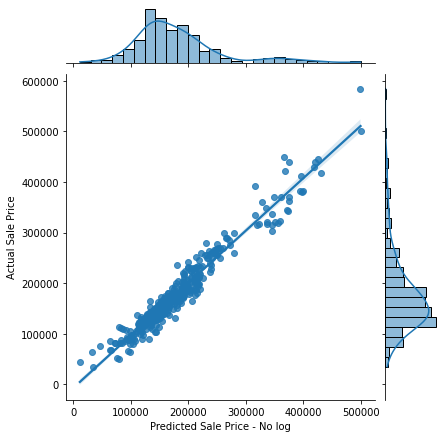

In [299]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')

In [300]:
feature_set_model = SelectFromModel(lasso_best)
feature_set_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=315.31740924754513))

In [301]:
len(X_train)

1639

In [302]:
len(y_train)

1639

In [303]:
feature_set_model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False,

In [304]:
len(kaggle_train_final.columns)

276

In [306]:
#refined model 
refined = kaggle_train_final.columns.drop('sale_price')[feature_set_model.get_support()]
len(refined)

144

In [307]:
X = kaggle_train_final[refined]
y = kaggle_train_final['sale_price']

# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [308]:
# fit 

lasso.fit(X_train,y_train)

lasso.alpha_

111.29781620991692

In [309]:
# create lasso best 2 

lasso_best_2 = Lasso(alpha=lasso.alpha_)

In [310]:
lasso_best_2.fit(X_train,y_train)

Lasso(alpha=111.29781620991692)

In [311]:
# cross val mse
cross_score = - cross_val_score(
    lasso_best_2,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best_2.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 347871755.45029795
MSE for test: 334421036.56805867
Underfited by: 13450718.882239282
RMSE: 18287.182302587204


Text(27.125, 0.5, 'Actual Sale Price')

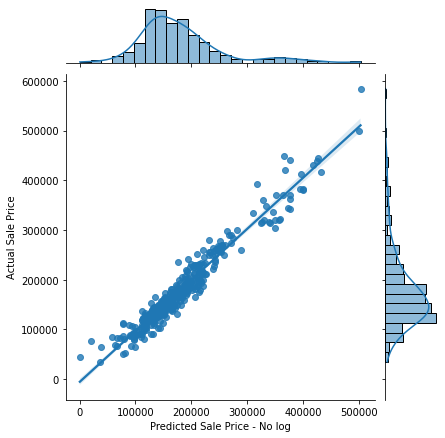

In [312]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best_2.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')

<AxesSubplot:>

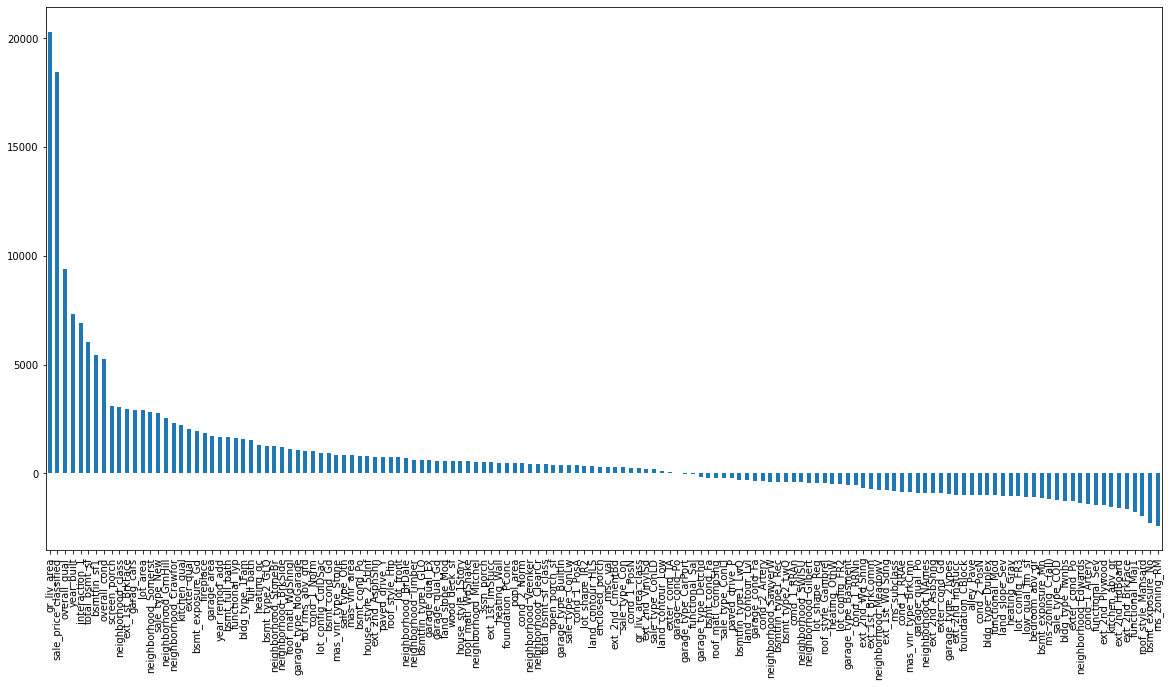

In [313]:
# hwo to plot the series 
plt.figure(figsize=(20,10))

# col = kaggle_train_final.columns.drop('sale_price')
pd.Series(lasso_best_2.coef_, index = refined).sort_values(ascending = False).plot.bar()

In [314]:
# Declare whole train set as X

X = kaggle_train_final.drop(columns = 'sale_price')
y = kaggle_train_final['sale_price']
lasso_best_2.fit(X,y)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.710e+11, tolerance: 1.288e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=111.29781620991692)

In [317]:
kaggle_train_final.drop(columns = 'sale_price').shape

(2049, 275)

In [316]:
kaggle_test_final.shape

(878, 276)

In [ ]:
# Submission to kaggle 

In [319]:
pred = lasso_best_2.predict(kaggle_test_final.drop(columns = 'sale_price'))

In [330]:
X.columns

Index(['lot_front', 'lot_area', 'overall_qual', 'year_built', 'year_remod_add',
       'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf',
       ...
       'sale_type_COD', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD',
       'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth',
       'sale_type_VWD', 'sale_type_WD '],
      dtype='object', length=275)

In [331]:
X['lot_front']

0       69.199672
1       43.000000
2       68.000000
3       73.000000
4       82.000000
          ...    
2046    79.000000
2047    69.199672
2048    57.000000
2049    80.000000
2050    60.000000
Name: lot_front, Length: 2049, dtype: float64

In [332]:
kaggle_test['lot_front']

0       69.0
1        NaN
2       58.0
3       60.0
4        NaN
5       21.0
6       52.0
7        NaN
8       39.0
9       75.0
10      50.0
11      60.0
12      75.0
13       NaN
14      69.0
15      60.0
16      60.0
17      68.0
18      80.0
19     121.0
20       NaN
21       NaN
22      50.0
23       NaN
24      80.0
25      60.0
26       NaN
27      50.0
28      80.0
29      51.0
30       NaN
31      52.0
32      65.0
33      80.0
34      75.0
35      58.0
36      60.0
37       NaN
38      74.0
39      73.0
40      40.0
41       NaN
42      75.0
43      75.0
44      46.0
45      21.0
46      68.0
47      60.0
48      74.0
49      75.0
50      52.0
51      50.0
52      65.0
53      60.0
54      60.0
55      61.0
56      60.0
57       NaN
58      85.0
59       NaN
60     136.0
61      60.0
62      85.0
63       NaN
64      65.0
65       NaN
66       NaN
67      34.0
68      70.0
69       NaN
70      52.0
71      59.0
72       NaN
73       NaN
74       NaN
75       NaN
76     100.0

In [328]:
len(kaggle_test.columns)

80

In [ ]:
temp = pd.concat()